New York City Taxi Trip Duration
--

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

File descriptions
train.csv - the training set (contains 1458644 trip records)
test.csv - the testing set (contains 625134 trip records)
sample_submission.csv - a sample submission file in the correct format

Data fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

First Solution Process: Linear Regression
--


EDA
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# home
sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

# SDacademy

#sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
#test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
#train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

In [2]:
df_sample_submission=pd.DataFrame(sample_submission)
df_test=pd.DataFrame(test)
df_train=pd.DataFrame(train)

In [3]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [5]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [6]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [10]:
# df_train 시간별로 라벨 생성
df_train['time_pickup']=df_train['pickup_datetime'].dt.strftime('%m%d%H%M%S')
df_train['time_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m%d%H%M%S')

df_train['month_pickup']=df_train['pickup_datetime'].dt.strftime('%m')
df_train['month_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m')

df_train['date_pickup']=df_train['pickup_datetime'].dt.strftime('%d')
df_train['date_dropoff']=df_train['dropoff_datetime'].dt.strftime('%d')

df_train['hour_pickup']=df_train['pickup_datetime'].dt.strftime('%H')
df_train['hour_dropoff']=df_train['dropoff_datetime'].dt.strftime('%H')

df_train['day_pickup']=df_train['pickup_datetime'].dt.strftime('%A')
df_train['day_dropoff']=df_train['dropoff_datetime'].dt.strftime('%A')

df_train.reset_index(drop=True, inplace=True)

In [11]:
# df_test 시간별로 라벨 생성
df_test['time_pickup']=df_test['pickup_datetime'].dt.strftime('%m%d%H%M%S')

df_test['month_pickup']=df_test['pickup_datetime'].dt.strftime('%m')

df_test['date_pickup']=df_test['pickup_datetime'].dt.strftime('%d')

df_test['hour_pickup']=df_test['pickup_datetime'].dt.strftime('%H')

df_test['day_pickup']=df_test['pickup_datetime'].dt.strftime('%A')

df_test.reset_index(drop=True, inplace=True)

In [12]:
# 만든 날짜 및 시간별 데이터 정수로 변환
df_train['time_pickup']=pd.Series(df_train['time_pickup'], dtype=int)
df_train['time_dropoff']=pd.Series(df_train['time_dropoff'], dtype=int)

df_train['month_pickup']=pd.Series(df_train['month_pickup'], dtype=int)
df_train['month_dropoff']=pd.Series(df_train['month_dropoff'], dtype=int)

df_train['date_pickup']=pd.Series(df_train['date_pickup'], dtype=int)
df_train['date_dropoff']=pd.Series(df_train['date_dropoff'], dtype=int)

df_train['hour_pickup']=pd.Series(df_train['hour_pickup'], dtype=int)
df_train['hour_dropoff']=pd.Series(df_train['hour_dropoff'], dtype=int)

df_test['time_pickup']=pd.Series(df_test['time_pickup'], dtype=int)
df_test['month_pickup']=pd.Series(df_test['month_pickup'], dtype=int)
df_test['date_pickup']=pd.Series(df_test['date_pickup'], dtype=int)
df_test['hour_pickup']=pd.Series(df_test['hour_pickup'], dtype=int)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  time_pickup         1458644 non-null  int32         
 12  time_dropoff        1458644 non-null  int32         
 13  month_pickup

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   time_pickup         625134 non-null  int32         
 10  month_pickup        625134 non-null  int32         
 11  date_pickup         625134 non-null  int32         
 12  hour_pickup         625134 non-null  int32         
 13  day_pickup          625134 no

In [15]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             625134 non-null  object
 1   trip_duration  625134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [16]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
dtype: int64

In [17]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
month_pickup          0
date_pickup           0
hour_pickup           0
day_pickup            0
dtype: int64

In [18]:
df_sample_submission.isna().sum()

id               0
trip_duration    0
dtype: int64

날짜별, 시간대별 승객 수 보기(택시 기사 본인 제외)
--

1월부터 6월까지 달 별 탑승 승객 수 
- passenger_count >= 2 

In [19]:
solo=df_train[df_train.passenger_count==1].index
df_p=df_train.drop(solo)
df_p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,130220140,130220903,1,1,30,30,22,22,Saturday,Saturday
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,617223459,617224040,6,6,17,17,22,22,Friday,Friday
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,...,515111611,515113459,5,5,15,15,11,11,Sunday,Sunday
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,...,219095246,219101120,2,2,19,19,9,10,Friday,Friday
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,...,510192738,510194440,5,5,10,10,19,19,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,...,306110448,306111745,3,3,6,6,11,11,Sunday,Sunday
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,...,317191016,317192635,3,3,17,17,19,19,Thursday,Thursday
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,...,403135125,403140737,4,4,3,3,13,14,Sunday,Sunday
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,...,202003939,202004633,2,2,2,2,0,0,Tuesday,Tuesday


In [20]:
df_p.groupby('month_pickup')['passenger_count'].sum().reset_index()

,month_pickup,passenger_count
0,1,221990
1,2,226055
2,3,243715
3,4,242059
4,5,237695
5,6,222902


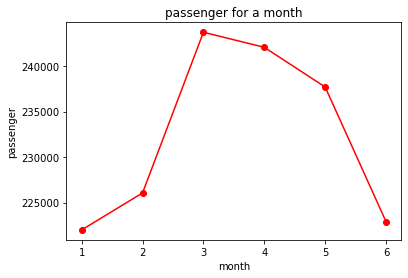

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_p['month_pickup'].unique()
month_passenger=df_p.groupby('month_pickup')['passenger_count'].sum()
month_passenger

labels=['1','2','3','4','5','6']

fig, ax=plt.subplots()
plt.plot(labels, month_passenger, marker="o", color='r')
plt.xlabel("month")
plt.ylabel("passenger")
plt.title("passenger for a month")
plt.show()

1일 부터 31일까지 일 별 탑승 승객 수

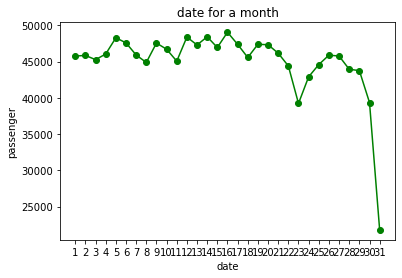

In [22]:
df_p['date_pickup'].unique()
date_passenger=df_p.groupby('date_pickup')['passenger_count'].sum()
date_passenger

labels=['1','2','3','4','5','6','7','8','9','10','11','12','13',
'14','15','16','17','18','19','20','21','22','23','24','25','26',
'27','28','29','30','31']

fig, ax=plt.subplots()
plt.plot(labels, date_passenger, marker="o", color='g')
plt.xlabel("date")
plt.ylabel("passenger")
plt.title("date for a month")
plt.show()

시간대별, 요일 별 승객 수 보기

[Text(0, 0.5, 'passenger'), Text(0.5, 1.0, 'day')]

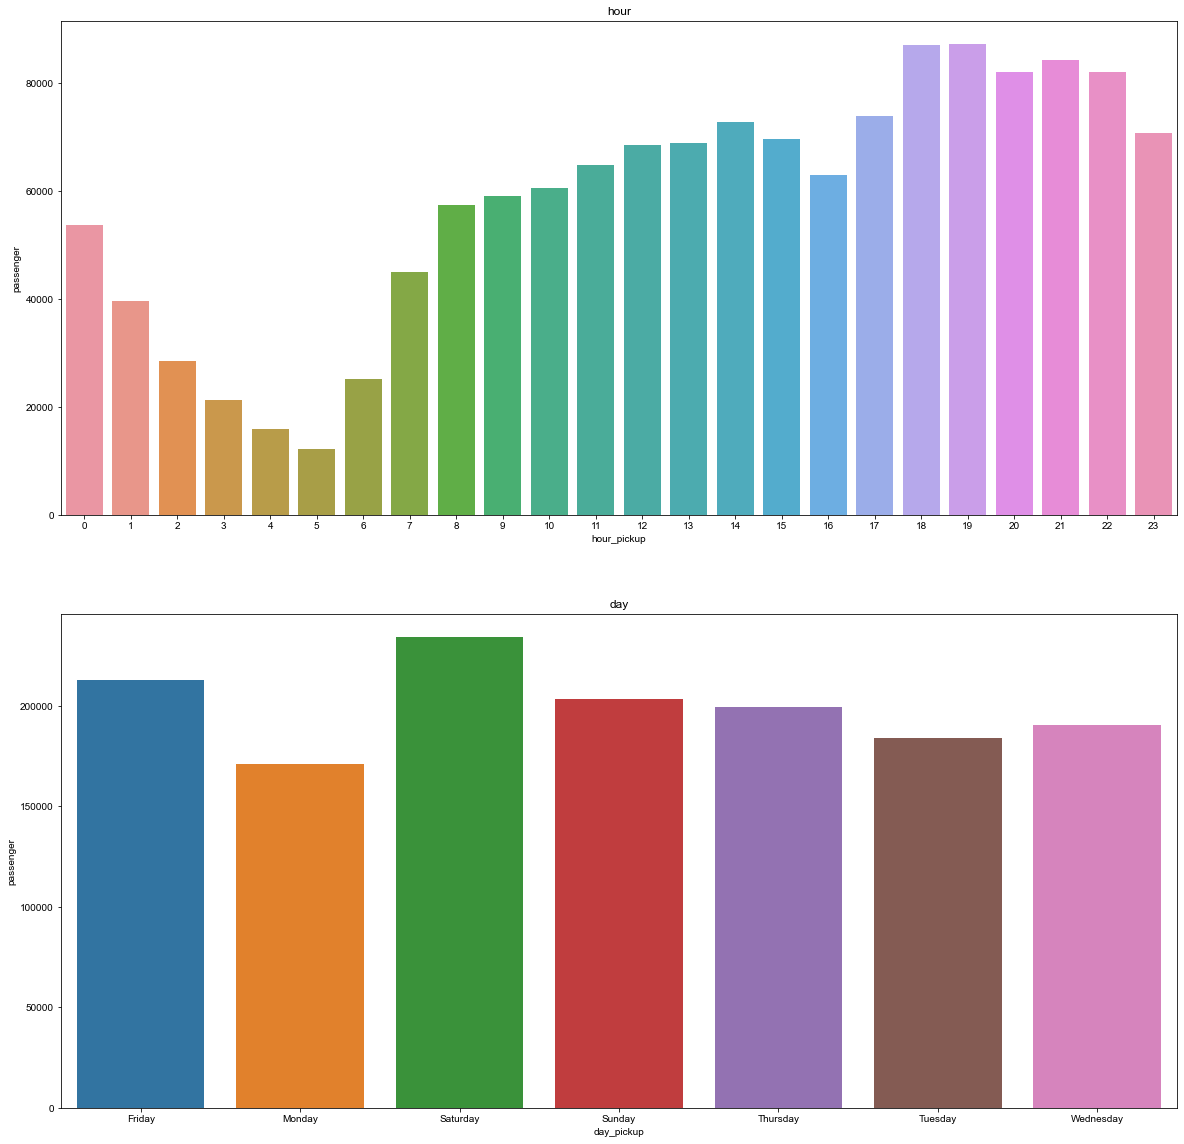

In [23]:
import seaborn as sns
hour_passenger=df_p.groupby('hour_pickup')['passenger_count'].sum().reset_index()
day_passenger=df_p.groupby('day_pickup')['passenger_count'].sum().reset_index()

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

sns.barplot(data=hour_passenger, x="hour_pickup", y="passenger_count", ax=ax1)
'\n'
sns.barplot(data=day_passenger, x="day_pickup", y="passenger_count", ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='passenger', title ="hour")
ax2.set(ylabel='passenger', title ="day")

- make elapsed_time column

In [24]:
i=0
elapsed_time=[]

for i in range(0,1458644):
    e_time=df_train.dropoff_datetime[i]-df_train.pickup_datetime[i]
    elapsed_time.append(e_time)
    i+=1

In [25]:
elapsed_time=pd.Series(elapsed_time)
df_train['elapsed_time']=elapsed_time
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,314173230,3,3,14,14,17,17,Monday,Monday,0 days 00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,612005438,6,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,119121048,1,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,406193940,4,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,326133810,3,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,408134402,4,4,8,8,13,13,Friday,Friday,0 days 00:12:58
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,110074610,1,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,422071025,4,4,22,22,6,7,Friday,Friday,0 days 00:12:44
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,105160239,1,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13


- make elapsed_time_h column
- elpased_time_h == trip_duration * 3600

In [26]:
i=0
elapsed_time_h=[]

for i in range(0,1458644):
    e_time_h=round((df_train.elapsed_time.iloc[i].seconds/3600), 5)
    elapsed_time_h.append(e_time_h)

In [27]:
elapsed_time_h=pd.Series(elapsed_time_h)
df_train['elapsed_time_h']=elapsed_time_h

- make distance column

In [28]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [29]:
df_train['distance']=df_train.id
df_test['distance']=df_test.id

In [30]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [31]:
d=pd.Series(d)
df_train['distance']=d

In [32]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [33]:
d=pd.Series(d)
df_test['distance']=d

- store_and_fwd_flag encoding

In [34]:
i=0
store_and_fwd_flag=[]

for i in range(0,1458644):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [35]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_train['store_and_fwd_flag']=store_and_fwd_flag

In [36]:
i=0
store_and_fwd_flag=[]

for i in range(0,625134):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [37]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_test['store_and_fwd_flag']=store_and_fwd_flag

store_and_fwd_flag ratio
--

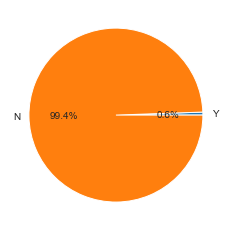

In [38]:
Y=len(df_train[df_train.store_and_fwd_flag==1].value_counts())
N=len(df_train[df_train.store_and_fwd_flag==0].value_counts())
store_and_fwd_flag=len(df_train.store_and_fwd_flag)

store_and_fwd_flag_ratio=[Y, N]
labels=['Y','N']

plt.pie(store_and_fwd_flag_ratio, labels=labels, autopct='%.1f%%')
plt.show()

- This flag indicates whether the trip record was held in vehicle memory before 

- sending to the vendor because the vehicle did not have a connection to the server

- Y=store and forward; N=not a store and forward trip


- store and forward 방식: 패킷교환에서 채택한 축적 교환(Store-and-Forward) 방식은 일단 들어오는 데이터를 버퍼에 담아두고(Store) CRC 등 에러검출과 같은 처리를 완전히 한 이후에 전달(Forward)하는 교환 기법이다.


vendor_id
--

- a code indicating the provider associated with the trip record

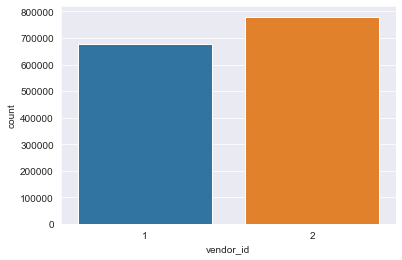

In [39]:
sns.countplot(df_train.vendor_id)
plt.show()

passenger_count
--

- passenger_count - the number of passengers in the vehicle (driver entered value)

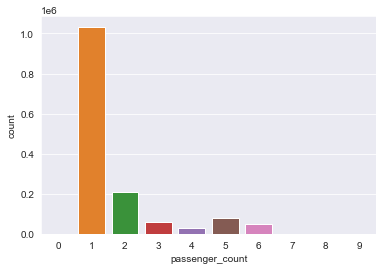

In [40]:
sns.countplot(df_train.passenger_count)
plt.show()

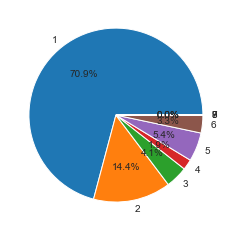

In [41]:
p1=len(df_train[df_train.passenger_count==1].value_counts())
p2=len(df_train[df_train.passenger_count==2].value_counts())
p3=len(df_train[df_train.passenger_count==3].value_counts())
p4=len(df_train[df_train.passenger_count==4].value_counts())
p5=len(df_train[df_train.passenger_count==5].value_counts())
p6=len(df_train[df_train.passenger_count==6].value_counts())
p7=len(df_train[df_train.passenger_count==7].value_counts())
p8=len(df_train[df_train.passenger_count==8].value_counts())
p9=len(df_train[df_train.passenger_count==9].value_counts())

pc=len(df_train.passenger_count)

passenger_count_ratio=[p1, p2, p3, p4, p5, p6, p7, p8, p9]
labels=['1','2','3','4','5','6','7','8','9']

plt.pie(passenger_count_ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [42]:
def bar_chart2(feature):
    no_passenger = df_train[df_train['passenger_count'] ==1][feature].value_counts() 
    passenger= df_train[df_train['passenger_count'] !=1][feature].value_counts() 
    df = pd.DataFrame([no_passenger,passenger]) 
    df.index = ['NO','YES'] 
    df.plot(kind = 'bar',stacked = True, figsize = (10,5)) 

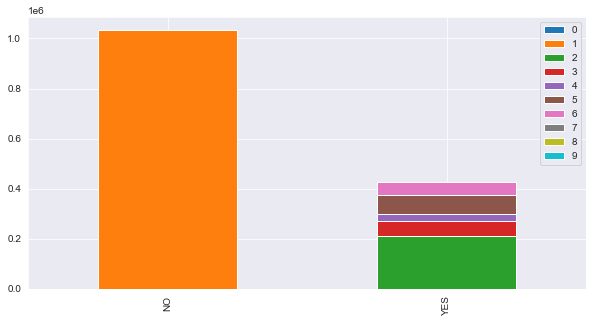

In [43]:
bar_chart2('passenger_count')

위도와 경도 분석하기
--

1.  train

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

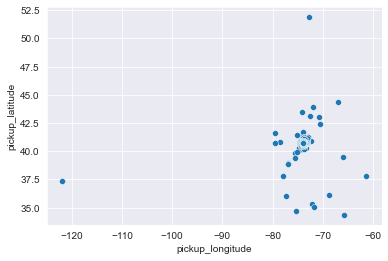

In [44]:
pickup=df_train.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

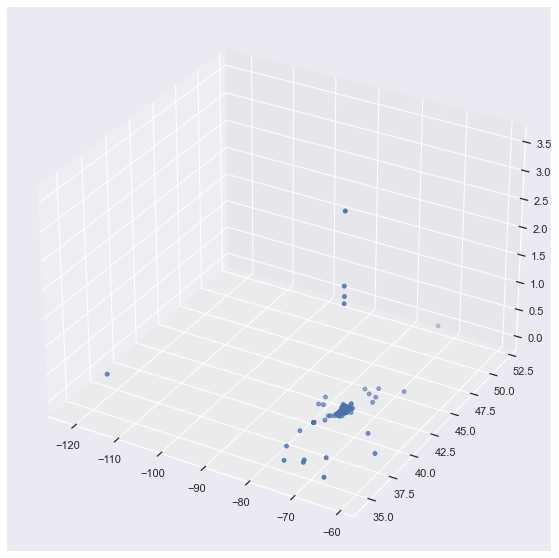

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

p_longitude=np.array(df_train.pickup_longitude)
p_latitude=np.array(df_train.pickup_latitude)
time=np.array(df_train.trip_duration)

xs=p_longitude
ys=p_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

- x: pickup_longitude
- y: pickup_latitude
- z: trip_duration

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

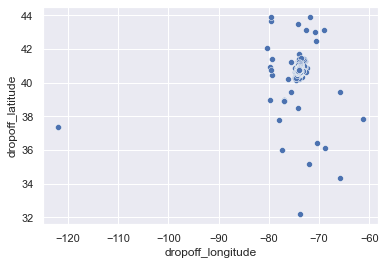

In [46]:
dropoff=df_train.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

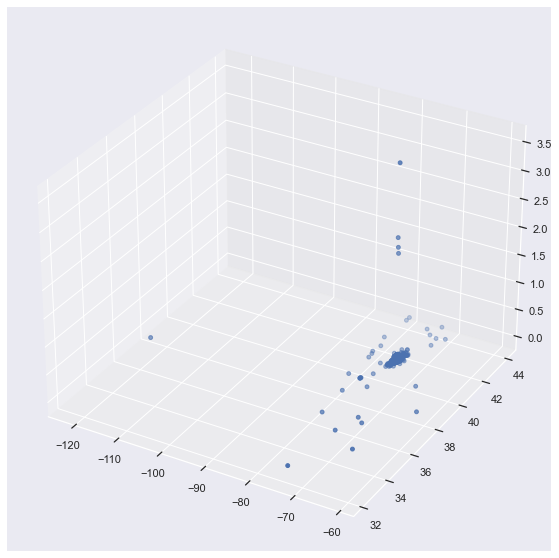

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

d_longitude=np.array(df_train.dropoff_longitude)
d_latitude=np.array(df_train.dropoff_latitude)
time=np.array(df_train.trip_duration)

xs=d_longitude
ys=d_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

2. test

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

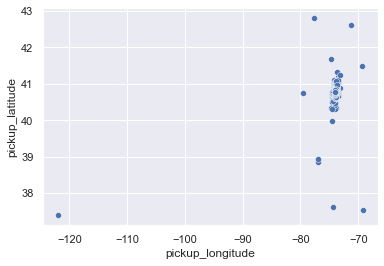

In [48]:
pickup=df_test.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

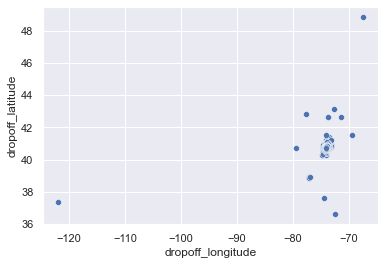

In [49]:
dropoff=df_test.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

Folium으로 지도 보기

1. train

In [50]:
pickup=df_train[['pickup_latitude','pickup_longitude']]
dropoff=df_train[['dropoff_latitude','dropoff_longitude']]

In [51]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [52]:
df_train.pickup_latitude.mean()

40.750920908391734

In [53]:
df_train.pickup_longitude.mean()

-73.97348630489282

In [54]:
len(pickup_list)

1458644

In [55]:
!pip install folium

In [56]:
import folium

lon, lat= -73.97348630489282, 40.750920908391734
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(1458644, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

2. test

In [57]:
pickup=df_test[['pickup_latitude','pickup_longitude']]
dropoff=df_test[['dropoff_latitude','dropoff_longitude']]

In [58]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [59]:
df_test.pickup_latitude.mean()

40.75092741194779

In [60]:
df_test.pickup_longitude.mean()

-73.97361432244571

In [61]:
len(pickup_list)

625134

In [62]:
import folium

lon, lat= -73.97361432244571, 40.75092741194779
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(625134, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

속도를 측정하여 칼럼 만들기
--

In [63]:
train_1=df_train.drop(['month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff'], axis=1)
train_1

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,Monday,Monday,0 days 00:07:35,0.12639,1.49852
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,Friday,Friday,0 days 00:12:58,0.21611,1.22508
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,Friday,Friday,0 days 00:12:44,0.21222,7.82461
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256


In [64]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [65]:
train_1=remove_outlier_test(train_1, 'elapsed_time_h' )
train_1=remove_outlier_test(train_1, 'distance' )

74324
(1384320, 18)
107658
(1276662, 18)


In [66]:
np_elap=np.array([train_1.elapsed_time_h])
np_dis=np.array([train_1.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
train_1['km_h']=np_speed

In [67]:
train_1=remove_outlier_test(train_1, 'km_h' )

39908
(1236754, 19)


속도 밀도 보기
--

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

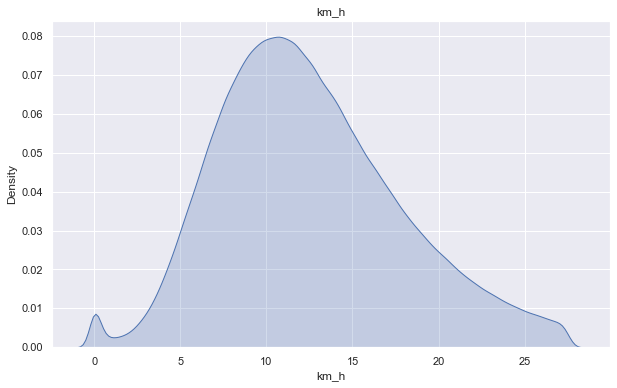

In [68]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=train_1['km_h'], shade=True)

In [69]:
print('km/h의 평균은', round(train_1.km_h.mean(), 2), 'km/h 입니다.')

km/h의 평균은 12.49 km/h 입니다.


- 실제로 Madision Ave 거리의 시작점과 끝점을 구글맵을 이용해 km/h를 계산하면, 
- 9.02km를 가는 데, 17분 정도가 소요된다. 이를 km/h로 환산하면 평균 31.83km/h가 나온다. ( 이 외에도 두 곳정도를 더 실험해본 결과 평균 30km/h대에서 계산되었음. )


- 이를 통해서 IQR 제거 이후 km/h의 분포가 낮은 km/h에서 형성된 것같다는 의심을 하였다.

- km/h가 낮게 나오는 이유를 예측해보면, 분자인 km가 너무 낮게 형성되어 있거나, h가 너무 높게 잡혀있을 것이라는 판단을 하였다.


- trip_duraion을 맞추는 문제에서 trip_duration에 전반적인 문제가 있을 확률보다는 km가 너무 낮게 형성되어있을 확률이 높을 거라는 추측하에 그 이유를 분석하여 예측거리 가설을 세웠다.

 --- 예측거리 가설은 PPT를 참고 ---
--

예측거리 칼럼 만들어 주기
--

In [70]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def prediction_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon_1=GeoUtil.degree2radius(x2-x1)
        dLat_1=GeoUtil.degree2radius(y1-y1)
        
        a=math.sin(dLat_1/2)*math.sin(dLat_1/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y1))\
           *math.sin(dLon_1/2)*math.sin(dLon_1/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        
        a1=round(R*b, round_decimal_digits)
        
        R=6371 # 지구의 반경(단위: km)
        dLon_2=GeoUtil.degree2radius(x2-x2)
        dLat_2=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat_2/2)*math.sin(dLat_2/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon_2/2)*math.sin(dLon_2/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        
        
        b1=round(R*b, round_decimal_digits)
        
        pred_dis=a1+b1
        
        return round(pred_dis, round_decimal_digits)

In [71]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.prediction_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [72]:
d=pd.Series(d)
df_train['pred_distance']=d
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,14,14,17,17,Monday,Monday,0 days 00:07:35,0.12639,1.49852,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,12,12,0,0,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,26,26,13,13,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,8,8,13,13,Friday,Friday,0 days 00:12:58,0.21611,1.22508,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,10,10,7,7,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,22,22,6,7,Friday,Friday,0 days 00:12:44,0.21222,7.82461,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256,1.52185


<AxesSubplot:title={'center':'pred_distance'}, xlabel='pred_distance', ylabel='Density'>

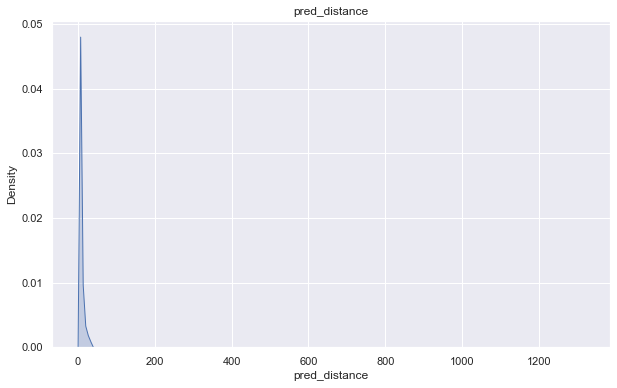

In [73]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pred_distance")
sns.kdeplot(data=df_train['pred_distance'], shade=True)

In [74]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.prediction_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [75]:
d=pd.Series(d)
df_test['pred_distance']=d

In [76]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,distance,pred_distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,Thursday,2.74643,2.91330
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,Thursday,2.75924,3.10480
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,Thursday,1.30616,1.84634
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,Thursday,5.26909,7.16334
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,Thursday,0.96084,1.35416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,Friday,0.96744,1.13575
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,Friday,6.19634,8.76282
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,Friday,8.15372,9.30275
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,Friday,20.38075,27.89350


<AxesSubplot:title={'center':'pred_distance'}, xlabel='pred_distance', ylabel='Density'>

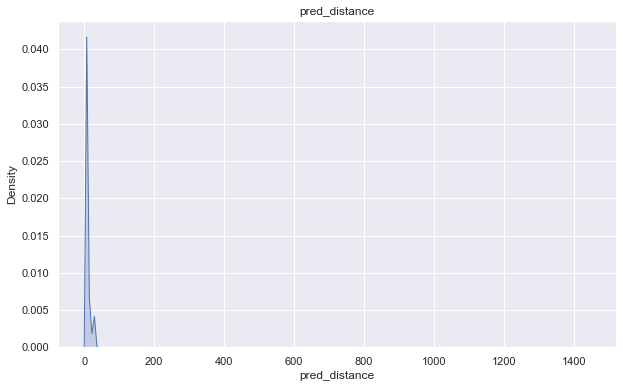

In [77]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pred_distance")
sns.kdeplot(data=df_test['pred_distance'], shade=True)

예측거리를 이용하여 속도를 측정하여 칼럼 만들기
--

In [78]:
train_2=df_train.drop(['month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff'], axis=1)
train_2

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,Monday,Monday,0 days 00:07:35,0.12639,1.49852,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,Friday,Friday,0 days 00:12:58,0.21611,1.22508,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,Friday,Friday,0 days 00:12:44,0.21222,7.82461,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256,1.52185


In [79]:
train_2=remove_outlier_test(train_2, 'elapsed_time_h' )
train_2=remove_outlier_test(train_2, 'pred_distance' )

74324
(1384320, 19)
105861
(1278459, 19)


In [80]:
np_elap=np.array([train_2.elapsed_time_h])
np_dis=np.array([train_2.pred_distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
train_2['km_h']=np_speed

In [81]:
train_2=remove_outlier_test(train_2, 'km_h' )

42147
(1236312, 20)


속도 밀도 비교하여 보기
--

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

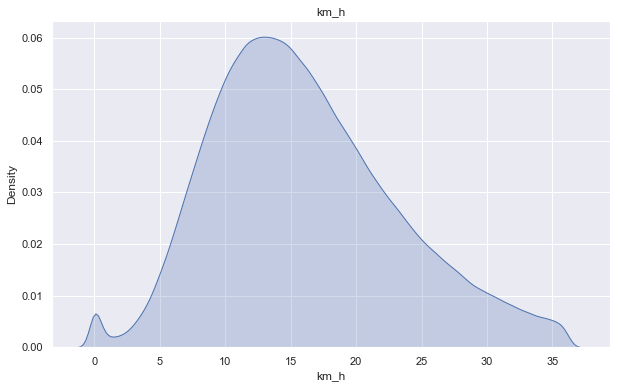

In [82]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=train_2['km_h'], shade=True)

In [83]:
print('harverdine km/h의 평균은', round(train_1.km_h.mean(), 2), 'km/h 입니다.')
print('prediction distance km/h의 평균은', round(train_2.km_h.mean(), 2), 'km/h 입니다.')

harverdine km/h의 평균은 12.49 km/h 입니다.
prediction distance km/h의 평균은 16.05 km/h 입니다.


Machine learning
--

1. train data를 Linear Regression에 맞게 전처리 해준다.
2. train data를 train, test로 나눠서 적용해본다.
3. 실제 train데이터를 train, test데이터를 test로 나눈다.
4. test데이터의 예측값을 sample_submissiondml trip_duration에 적용해준다.

In [84]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time',
       'elapsed_time_h', 'distance', 'pred_distance'],
      dtype='object')

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   pickup_datetime     1458644 non-null  datetime64[ns] 
 3   dropoff_datetime    1458644 non-null  datetime64[ns] 
 4   passenger_count     1458644 non-null  int64          
 5   pickup_longitude    1458644 non-null  float64        
 6   pickup_latitude     1458644 non-null  float64        
 7   dropoff_longitude   1458644 non-null  float64        
 8   dropoff_latitude    1458644 non-null  float64        
 9   store_and_fwd_flag  1458644 non-null  int64          
 10  trip_duration       1458644 non-null  int64          
 11  time_pickup         1458644 non-null  int32          
 12  time_dropoff        1458644 non-null  int32          
 1

In [86]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time',
       'elapsed_time_h', 'distance', 'pred_distance'],
      dtype='object')

In [87]:
lr_train=df_train.drop(['pickup_datetime','dropoff_datetime','elapsed_time','day_pickup','day_dropoff',
                      'month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff','distance'], axis=1)

lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,pred_distance
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.73544
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,2.43050
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,0.59000,8.20358
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.66133
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.66590
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,0.18194,8.05858
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,0.21222,10.64565
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.52185


In [88]:
lr_test=df_test.drop(['pickup_datetime','distance','day_pickup', 'month_pickup','date_pickup','hour_pickup'], axis=1)

lr_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,pred_distance
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,2.91330
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,3.10480
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,1.84634
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,7.16334
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,1.35416
...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1.13575
625130,id3700764,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,8.76282
625131,id2568735,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,9.30275
625132,id1384355,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,27.89350


id label encoding

In [89]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_train_encoded_id=le.fit_transform(lr_train['id'])
np_id=lr_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_train['id']=id_1

In [90]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_test_encoded_id=le.fit_transform(lr_test['id'])
np_id=lr_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_test['id']=id_1

IQR을 이용하여 이상치 제거

In [91]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [92]:
lr_train=remove_outlier_test(lr_train, 'elapsed_time_h' )
lr_train=remove_outlier_test(lr_train, 'pred_distance' )
lr_train

74324
(1384320, 13)
105861
(1278459, 13)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,pred_distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.73544
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,2.43050
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.66133
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.19946
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,0.12306,1.55418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,0.11500,2.34620
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.66590
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,0.18194,8.05858
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.52185


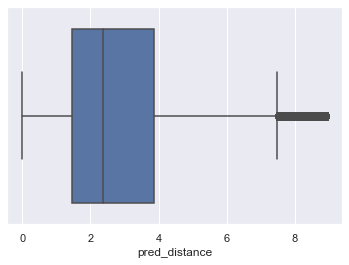

In [93]:
sns.boxplot(x = "pred_distance", orient = "v", data = lr_train)
sns.set_style("darkgrid")
plt.show()

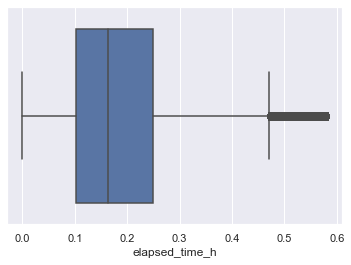

In [94]:
sns.boxplot(x = "elapsed_time_h", orient = "v", data = lr_train)
sns.set_style("darkgrid")
plt.show()

평균 속도 칼럼 만들어 주기

In [95]:
np_elap=np.array([lr_train.elapsed_time_h])
np_dis=np.array([lr_train.pred_distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
lr_train['km_h']=np_speed
lr_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,pred_distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.73544,13.730833
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,2.43050,13.197046
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.66133,13.940841
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.19946,9.926839
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,0.12306,1.55418,12.629449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,0.11500,2.34620,20.401739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.66590,7.708574
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,0.18194,8.05858,44.292514
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.52185,14.688254


In [96]:
lr_train=remove_outlier_test(lr_train, 'km_h' )
lr_train

42147
(1236312, 14)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,elapsed_time_h,pred_distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,0.12639,1.73544,13.730833
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,0.18417,2.43050,13.197046
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,0.11917,1.66133,13.940841
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,0.12083,1.19946,9.926839
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,0.12306,1.55418,12.629449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,417190056,0.21111,4.96633,23.524845
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,0.11500,2.34620,20.401739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,0.21611,1.66590,7.708574
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,0.10361,1.52185,14.688254


거리, 속력, 시간 시각화

<AxesSubplot:title={'center':'distance'}, xlabel='pred_distance', ylabel='Density'>

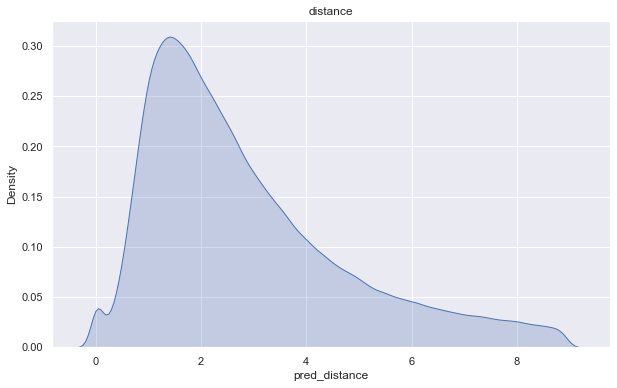

In [97]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("distance")
sns.kdeplot(data=lr_train['pred_distance'], shade=True)

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

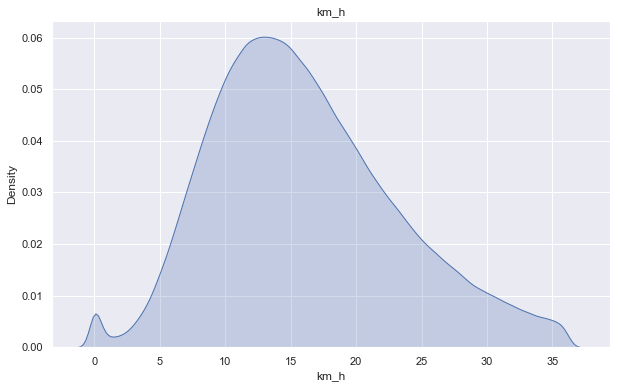

In [98]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=lr_train['km_h'], shade=True)

<AxesSubplot:title={'center':'elapsed_time_h'}, xlabel='elapsed_time_h', ylabel='Density'>

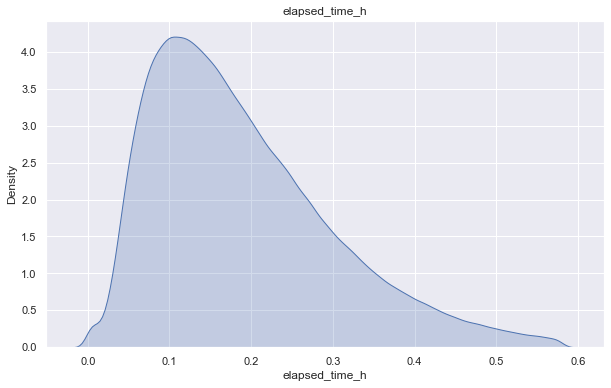

In [99]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("elapsed_time_h")
sns.kdeplot(data=lr_train['elapsed_time_h'], shade=True)

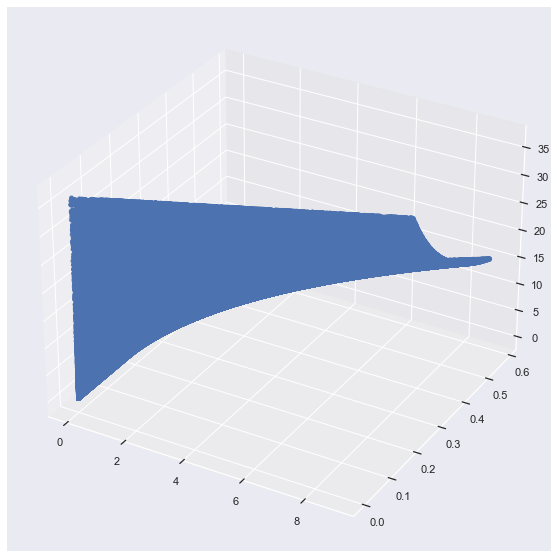

In [100]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

time=np.array(lr_train.elapsed_time_h)
distance=np.array(lr_train.pred_distance)
speed=np.array(lr_train.km_h)

xs=distance
ys=time
zs=speed

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)


- x: distance(km)
- y: time(elapsed_time_h)
- z: speed(km/h)

모든 변수를 포함한 Linear Regression Model 만들기
--

train 데이터를 train, test로 나누어서 학습시켜보기
--

In [101]:
lr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236312 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1236312 non-null  int64  
 1   vendor_id           1236312 non-null  int64  
 2   passenger_count     1236312 non-null  int64  
 3   pickup_longitude    1236312 non-null  float64
 4   pickup_latitude     1236312 non-null  float64
 5   dropoff_longitude   1236312 non-null  float64
 6   dropoff_latitude    1236312 non-null  float64
 7   store_and_fwd_flag  1236312 non-null  int64  
 8   trip_duration       1236312 non-null  int64  
 9   time_pickup         1236312 non-null  int32  
 10  time_dropoff        1236312 non-null  int32  
 11  elapsed_time_h      1236312 non-null  float64
 12  pred_distance       1236312 non-null  float64
 13  km_h                1236312 non-null  float64
dtypes: float64(7), int32(2), int64(5)
memory usage: 132.1 MB


In [102]:
X=lr_train.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [103]:
y=lr_train.trip_duration

In [104]:
X

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,pred_distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,1.73544
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,2.43050
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,1.66133
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,1.19946
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,130220140,1.55418
...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,417184816,4.96633
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,202003939,2.34620
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,1.66590
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1.52185


In [105]:
y

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236312, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989049, 10)
(247263, 10)
(989049,)
(247263,)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

- lr_train의 train 점수보기

In [108]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 284.7992297509376 입니다.
r2 는 0.49 입니다.
train 스코어는 0.4923480624912101 입니다.


- lr_train의 test 점수보기

In [109]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 285.24752570007047 입니다.
r2 점수는 0.49 입니다.
test 스코어는 0.4906114162504702 입니다.


In [110]:
y_test

608756     1190
1148663     356
284538      359
709165     1805
760301      605
           ... 
1131085     607
684772      519
1411054     866
13392       427
1359998     674
Name: trip_duration, Length: 247263, dtype: int64

In [111]:
y_test_pred.reshape(-1,1)

array([[1273.81818418],
       [ 726.61224814],
       [ 797.1021361 ],
       ...,
       [1074.80548078],
       [ 633.21528326],
       [ 554.57685584]])

In [112]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.198e+05
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:13:31   Log-Likelihood:            -8.7419e+06
No. Observations:             1236312   AIC:                         1.748e+07
Df Residuals:                 1236301   BIC:                         1.748e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.287e+04    567.593     22.673      0.000    1.18e+04     1.4e+04
id                  1.123e-06   6.09e-07      1.845      0.065   -7.02e-08    2.32e-06
vendor_id              0.5205      0.538      0.967      0.333      -0.534       1.575
passenger_count        2.2052      0.204     10.809      0.000       1.805       2.605
pickup_longitude     360.4681     15.818     22.789      0.000     329.466     391.470
pickup_latitude      510.9987     15.957     32.024      0.000     479.724     542.273
dropoff_longitude   -439.5916     15.700    -27.999      0.000    -470.363    -408.820
dropoff_latitude    -964.9806     14.770    -65.335      0.000    -993.929    -936.032
store_and_fwd_flag    18.0054      3.715      4.846      0.000      10.723      25.288
time_pickup         1.027e-07   1.52e-09     67.335      0.000    9.97e-08    1.06e-07
pred_distance        146.2959      0.136   1072.789      0.000     146.029     146.563
==============================================================================
Omnibus:                   270475.333   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           622747.196
Skew:                           1.242   Prob(JB):                         0.00
Kurtosis:                       5.433   Cond. No.                     8.92e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 81366.151 , RMSE : 285.248
Variance score : 0.491


In [114]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

pickup_latitude       521.7
pickup_longitude      346.1
pred_distance         146.4
store_and_fwd_flag     16.0
passenger_count         2.1
vendor_id               0.5
time_pickup             0.0
id                      0.0
dropoff_longitude    -467.8
dropoff_latitude     -949.3
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

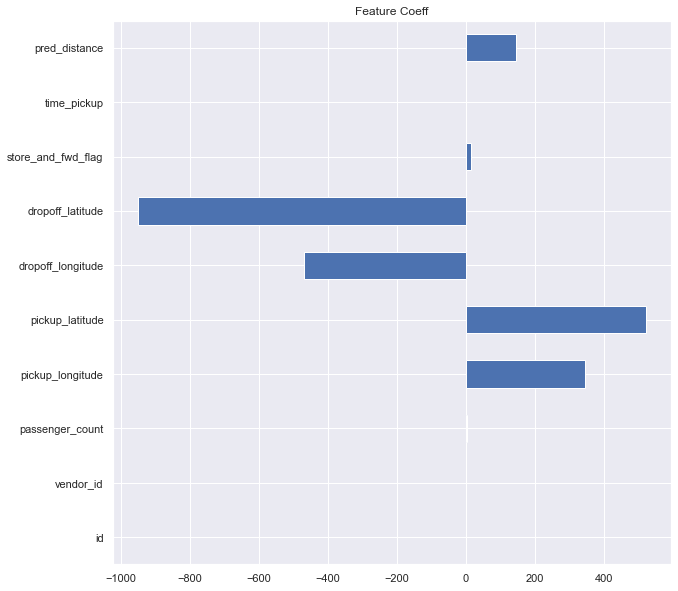

In [115]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test score: {:.3f}'.format(ridge.score(X_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test score: {:.3f}'.format(lasso.score(X_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test score: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.492
lr test score: 0.491
lr mse: 81366.151
lr rmse: 285.248


ridge train score: 0.492
ridge test score: 0.491
ridge mse: 81366.170
ridge rmse: 285.248


lasso train score: 0.489
lasso test score: 0.487
lasso mse: 81874.145
lasso rmse: 286.137


elasticnet train score: 0.481
elasticnet test score: 0.480
elasticnet mse: 83014.463
elasticnet rmse: 288.122


실제 train데이터와 test 데이터에 적용해보기
--

In [117]:
X_train=lr_train.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [118]:
X_test=lr_test

In [119]:
X_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,pred_distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,1.73544
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,2.43050
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,1.66133
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,1.19946
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,130220140,1.55418
...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,417184816,4.96633
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,202003939,2.34620
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,1.66590
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1.52185


In [120]:
X_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,pred_distance
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,2.91330
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,3.10480
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,1.84634
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,7.16334
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,1.35416
...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1.13575
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,8.76282
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,9.30275
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,27.89350


In [121]:
y_train=lr_train.trip_duration
y_train

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236312, dtype: int64

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 284.8751867741161 입니다.
r2 는 0.49 입니다.
train 스코어는 0.49205045568922645 입니다.


In [124]:
pred=reg_all.predict(X_test)

In [125]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [126]:
submission

,id,trip_duration
0,id3004672,720.767617
1,id3505355,815.286726
2,id1217141,588.286887
3,id2150126,1398.477759
4,id1598245,502.090690
...,...,...
625129,id3008929,424.418821
625130,id3700764,1480.702220
625131,id2568735,1581.062350
625132,id1384355,4135.501821


In [127]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X_train)

model_1=sm.OLS(y_train,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.198e+05
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:13:37   Log-Likelihood:            -8.7419e+06
No. Observations:             1236312   AIC:                         1.748e+07
Df Residuals:                 1236301   BIC:                         1.748e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.287e+04    567.593     22.673      0.000    1.18e+04     1.4e+04
id                  1.123e-06   6.09e-07      1.845      0.065   -7.02e-08    2.32e-06
vendor_id              0.5205      0.538      0.967      0.333      -0.534       1.575
passenger_count        2.2052      0.204     10.809      0.000       1.805       2.605
pickup_longitude     360.4681     15.818     22.789      0.000     329.466     391.470
pickup_latitude      510.9987     15.957     32.024      0.000     479.724     542.273
dropoff_longitude   -439.5916     15.700    -27.999      0.000    -470.363    -408.820
dropoff_latitude    -964.9806     14.770    -65.335      0.000    -993.929    -936.032
store_and_fwd_flag    18.0054      3.715      4.846      0.000      10.723      25.288
time_pickup         1.027e-07   1.52e-09     67.335      0.000    9.97e-08    1.06e-07
pred_distance        146.2959      0.136   1072.789      0.000     146.029     146.563
==============================================================================
Omnibus:                   270475.333   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           622747.196
Skew:                           1.242   Prob(JB):                         0.00
Kurtosis:                       5.433   Cond. No.                     8.92e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

pickup_latitude       511.0
pickup_longitude      360.5
pred_distance         146.3
store_and_fwd_flag     18.0
passenger_count         2.2
vendor_id               0.5
time_pickup             0.0
id                      0.0
dropoff_longitude    -439.6
dropoff_latitude     -965.0
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

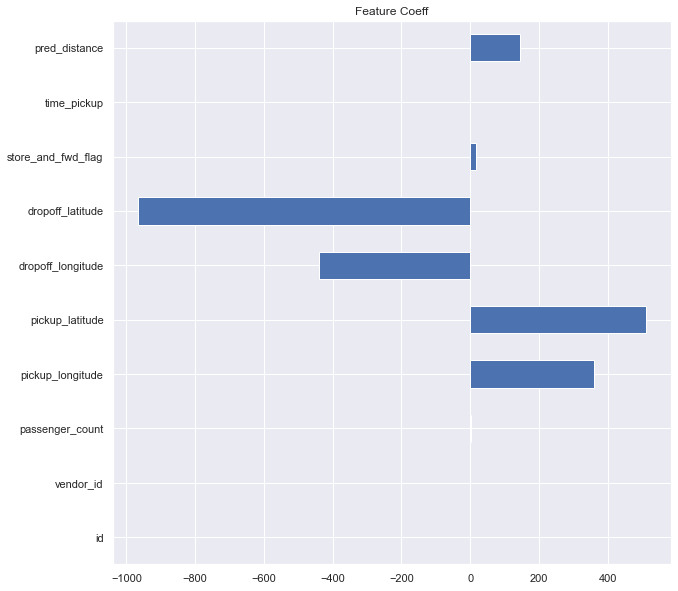

In [129]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.492
lr mse: 81153.872
lr rmse: 284.875


ridge train score: 0.492
ridge mse: 81153.876
ridge rmse: 284.875


lasso train score: 0.488
lasso mse: 81741.107
lasso rmse: 285.904


elasticnet train score: 0.481
elasticnet mse: 82897.522
elasticnet rmse: 287.919


In [132]:
#submission.to_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/submission(0516).csv', index=False)

<AxesSubplot:title={'center':'trip_duration'}, xlabel='trip_duration', ylabel='Density'>

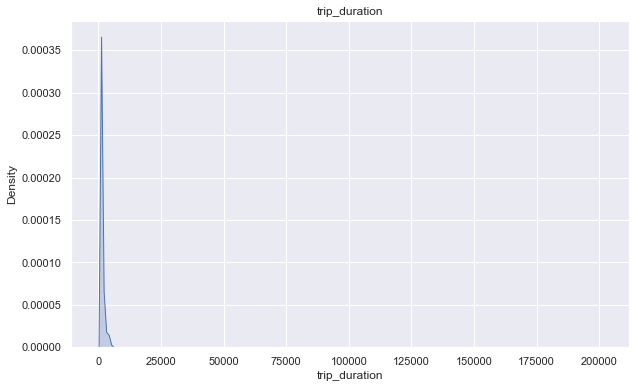

In [131]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("trip_duration")
sns.kdeplot(data=submission['trip_duration'], shade=True)

Second Solution Process: Classification
--

EDA
--

In [133]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,14,14,17,17,Monday,Monday,0 days 00:07:35,0.12639,1.49852,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,12,12,0,0,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,26,26,13,13,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,8,8,13,13,Friday,Friday,0 days 00:12:58,0.21611,1.22508,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,10,10,7,7,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,22,22,6,7,Friday,Friday,0 days 00:12:44,0.21222,7.82461,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256,1.52185


In [134]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,distance,pred_distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,Thursday,2.74643,2.91330
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,Thursday,2.75924,3.10480
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,Thursday,1.30616,1.84634
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,Thursday,5.26909,7.16334
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,Thursday,0.96084,1.35416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,Friday,0.96744,1.13575
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,Friday,6.19634,8.76282
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,Friday,8.15372,9.30275
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,Friday,20.38075,27.89350


In [135]:
cl_train=df_train.drop(['pickup_datetime','time_dropoff','dropoff_datetime','elapsed_time','day_dropoff',
                      'month_dropoff','date_dropoff','hour_dropoff','distance','trip_duration'], axis=1)

cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,elapsed_time_h,pred_distance
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,3,14,17,Monday,0.12639,1.73544
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,6,12,0,Sunday,0.18417,2.43050
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,119113524,1,19,11,Tuesday,0.59000,8.20358
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,4,6,19,Wednesday,0.11917,1.66133
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,3,26,13,Saturday,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,4,8,13,Friday,0.21611,1.66590
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,110073515,1,10,7,Sunday,0.18194,8.05858
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,422065741,4,22,6,Friday,0.21222,10.64565
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1,5,15,Tuesday,0.10361,1.52185


In [136]:
cl_test=df_test.drop(['pickup_datetime','distance'], axis=1)

cl_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,pred_distance
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,Thursday,2.91330
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,Thursday,3.10480
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,Thursday,1.84634
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,Thursday,7.16334
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,Thursday,1.35416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,Friday,1.13575
625130,id3700764,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,Friday,8.76282
625131,id2568735,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,Friday,9.30275
625132,id1384355,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,Friday,27.89350


id_label_encoding

In [137]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_train_encoded_id=le.fit_transform(cl_train['id'])
np_id=cl_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

cl_train['id']=id_1

In [138]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_test_encoded_id=le.fit_transform(cl_test['id'])
np_id=cl_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

cl_test['id']=id_1

day_label_encoding

In [139]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_train_encoded_day=le.fit_transform(cl_train['day_pickup'])
np_day=cl_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

cl_train['day_pickup']=day_1

In [140]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_test_encoded_day=le.fit_transform(cl_test['day_pickup'])
np_day=cl_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

cl_test['day_pickup']=day_1

Clustering
--

- cl_train 데이터를 이용하여

- MinMax Scaler(cl_train)

- Standard Scaler(cl_train)

- 비교하여 보기

In [141]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(cl_train)

print(kmeans.labels_)

print(kmeans.predict(cl_train))

[2 4 1 ... 9 8 3]
[2 4 1 ... 9 8 3]


pickup_longititude와 pickup_latitude
--

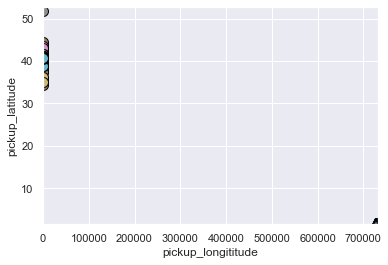

In [142]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(cl_train.iloc[:, 3], cl_train.iloc[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longititude")
plt.ylabel("pickup_latitude")
plt.show()

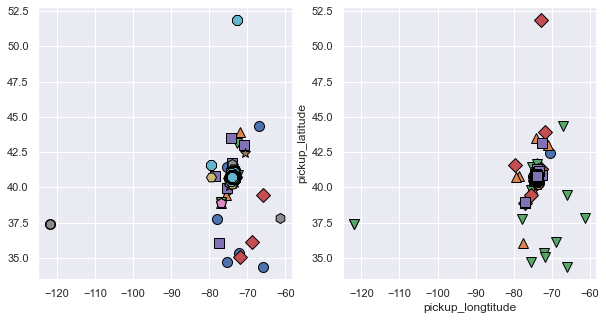

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(cl_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(cl_train.iloc[:, 3], cl_train.iloc[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(cl_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(cl_train.iloc[:, 3], cl_train.iloc[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

In [144]:
X=cl_train
y=df_train.trip_duration

In [145]:
# 훈련데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166915, 15)
(291729, 15)
(1166915,)
(291729,)


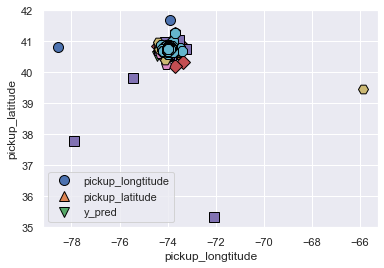

In [146]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, 3], X_test.iloc[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

In [147]:
X.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'time_pickup', 'month_pickup', 'date_pickup',
       'hour_pickup', 'day_pickup', 'elapsed_time_h', 'pred_distance'],
      dtype='object')

Text(0, 0.5, 'pickup_latitude')

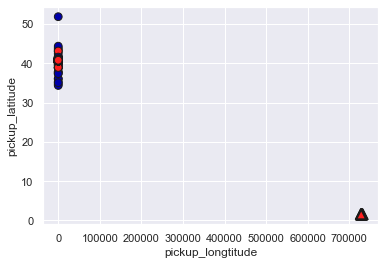

In [148]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 3], X.iloc[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께dropoff_longtitude와 dropoff_latitude

dropoff_longtitude와 dropoff_latitude
--

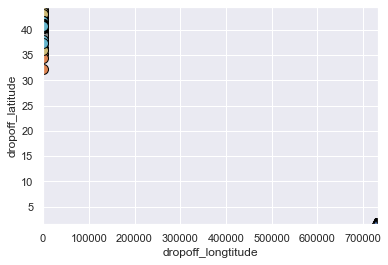

In [149]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

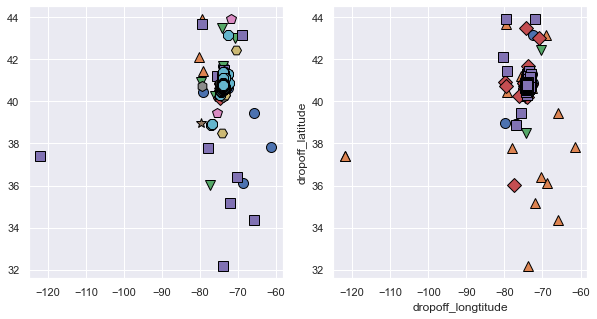

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

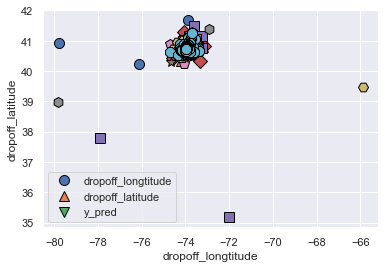

In [151]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, 5], X_test.iloc[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

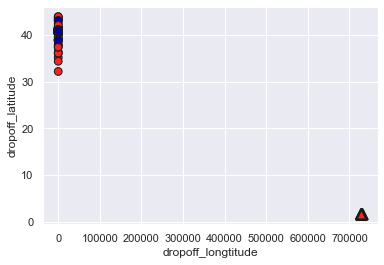

In [152]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 5], X.iloc[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

PCA
--

In [153]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 4.38343602e+15  4.69887914e+06  2.47182846e+07 -9.05337192e+05
  -3.41397345e+03 -1.23365850e+06  5.33732195e+04  1.67677822e+05
   1.93545689e+15  1.83456667e+07  1.00091914e+08  8.04578957e+07
   3.92011365e+06 -7.03866596e+06 -1.18884332e+07]
 [ 4.69887914e+06  6.15049551e+03  4.65788619e+03  6.83725655e+00
   7.06149061e-01  1.33145428e+00  1.98981815e+00 -7.29436426e+01
  -1.28086166e+10 -1.28946865e+02  7.87399402e+01  7.33804311e+02
   1.15545259e+01  3.88191165e+02  5.72510861e+02]
 [ 2.47182846e+07  4.65788619e+03  4.27019586e+04  4.99606446e+00
  -5.47560842e+00 -7.87370321e-01 -3.22122046e+00 -5.24938984e+01
  -1.11175147e+10 -1.17060571e+02  5.69562584e+02  1.89252450e+03
  -6.51445211e+02  4.20805010e+02  1.91788014e+03]
 [-9.05337192e+05  6.83725655e+00  4.99606446e+00  1.24283146e+02
   1.30077198e+00  9.70308524e+01  6.30314985e+00  1.40187351e+00
   1.30627724e+09  1.31848566e+01 -1.33392195e+01  1.13867397e+02
  -1.94909422e-01  6.25776259e+01  2.60309746e+03]
 [-3

In [154]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [6.99413370e+20 4.38343066e+15 1.87033857e+06 1.01347247e+06
 7.93062315e+05 9.98688757e+04 4.32758844e+04 1.87545685e+04
 5.55840658e+03 2.12588774e+02 1.34613264e+02 4.08057354e+01
 2.57652461e+01 1.41742219e+01 7.41997329e-06]
eigenvector :
 [[-2.76727483e-06 -1.00000000e+00  2.19981477e-08 -1.85615814e-08
   1.96061871e-09 -4.28343340e-10 -5.67705689e-09  1.67836412e-09
   4.00367756e-10  3.32495459e-10 -5.45209469e-11 -2.83242201e-11
  -4.99240131e-11  2.46995861e-12  1.44620531e-14]
 [ 1.83131285e-11 -1.08004991e-09 -5.82578552e-05  6.98343635e-04
   8.19264679e-04 -4.56193226e-04  1.24546056e-01  2.22950167e-02
  -9.91886477e-01 -6.75824113e-04  1.22507728e-02 -4.16486206e-04
  -5.79622358e-04 -5.26353628e-05  1.20234906e-08]
 [ 1.58954848e-11 -5.64604570e-09 -3.29322823e-04  1.81768045e-03
   2.73001271e-03 -1.15916321e-02  9.91993092e-01 -1.99787706e-02
   1.24117999e-01  1.80317963e-04 -8.95885415e-05  1.10636083e-04
   3.25466160e-05  2.85845306e-05 -1.58648473e

In [155]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [9.99993733e-01 6.26725679e-06 2.67413653e-15 1.44902309e-15
 1.13388931e-15 1.42788591e-16 6.18741576e-17 2.68145445e-17
 7.94719114e-18 3.03951069e-19 1.92464751e-19 5.83424358e-20
 3.68381357e-20 2.02657451e-20 1.06087860e-26]


In [156]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [157]:
pca.components_

array([[-2.76727483e-06,  1.83134678e-11,  1.58954848e-11,
        -1.86767553e-12,  3.46096093e-13, -1.98359435e-12,
         1.89814244e-13, -2.02685978e-13, -1.00000000e+00,
        -9.98106460e-09, -1.89470528e-09,  1.15444460e-10,
        -3.46647193e-10, -7.01986588e-11, -5.30950823e-10],
       [ 1.00000000e+00,  1.08004993e-09,  5.64604570e-09,
        -2.07360876e-10, -6.26019982e-13, -2.82312594e-10,
         1.22599405e-11,  3.81631517e-11, -2.76727483e-06,
        -2.21829589e-10,  2.19975581e-08,  1.84059795e-08,
         7.41243332e-10, -1.63673931e-09, -2.94656698e-09],
       [-2.19981477e-08,  5.82596310e-05,  3.29322828e-04,
        -7.05772041e-08, -2.76988118e-05, -9.68203737e-07,
        -2.49823347e-05,  1.00397063e-05, -1.79863668e-09,
        -9.99936555e-03,  9.99928842e-01,  7.74042873e-04,
         2.40954416e-03,  2.49236910e-04,  5.97852488e-03],
       [ 1.85615814e-08, -6.98343381e-04, -1.81768044e-03,
         4.64417698e-05, -1.19800949e-04,  3.27945912

In [158]:
pca.explained_variance_

array([2.82902594e+16, 1.77303431e+11, 7.56524903e+01, 4.09934959e+01,
       3.20782238e+01, 4.03955160e+00, 1.75044695e+00, 7.58595174e-01,
       2.24829499e-01, 8.59890848e-03, 5.44491186e-03, 1.65053299e-03,
       1.04216695e-03, 5.73326779e-04, 3.00112072e-10])

<AxesSubplot:>

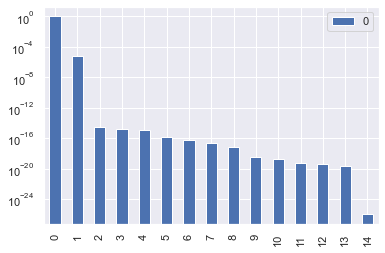

In [159]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC0,9.999937e-01
PC1,6.267257e-06
PC2,2.674137e-15
PC3,1.449023e-15
PC4,1.133889e-15
PC5,1.427886e-16
PC6,6.187416e-17
PC7,2.681454e-17
PC8,7.947191e-18
PC9,3.039511e-19


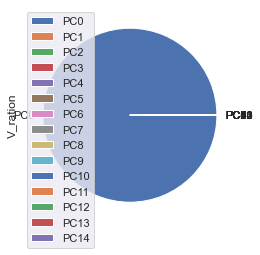

In [161]:
df_v = pd.DataFrame(ratio, index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [162]:
PC_score = pca.transform(X)
PC_score[:5]

array([[ 5.31523830e+07,  3.19970587e+05, -1.42878717e+00,
        -3.52060335e+00, -2.45840331e+00, -2.00447171e+00,
        -6.27785625e-01,  4.50482982e-02, -5.46077131e-01,
        -1.11263985e-02,  8.79138643e-04, -1.71696997e-02,
         8.85830846e-03,  1.92807977e-03, -5.38077416e-06],
       [-2.44679496e+08,  1.37656405e+05, -3.99456821e+00,
         1.34220848e+01, -2.96107197e+00,  6.71154701e-02,
        -6.87000931e-01,  2.87521840e-02,  4.35774344e-01,
         1.95862056e-02, -1.03659564e-02,  2.62424310e-02,
        -1.63762648e-02,  4.82379503e-03,  1.33120824e-05],
       [ 2.48211313e+08,  6.78264369e+05,  3.97760693e+00,
         2.86458231e+00,  3.69576217e+00,  2.13041826e+00,
        -5.87180173e-01, -2.71696407e-01, -5.30843052e-01,
         4.16849348e-02, -6.06377242e-04,  1.62898995e-02,
        -6.18798318e-03,  3.95642818e-02,  5.49187729e-06],
       [-3.88683936e+07,  5.48779940e+05, -9.59561441e+00,
        -5.58391551e+00, -2.42034296e+00,  2.96246504

MinMaxScaler 적용하기
--

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [164]:
X_scaled=scaler.transform(X)

In [165]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (1166915, 15)
스케일 조정 전 특성별 최소값:
 id                    1.000000e+00
vendor_id             1.000000e+00
passenger_count       0.000000e+00
pickup_longitude     -1.219333e+02
pickup_latitude       3.435970e+01
dropoff_longitude    -1.219333e+02
dropoff_latitude      3.218114e+01
store_and_fwd_flag    0.000000e+00
time_pickup           1.010000e+08
month_pickup          1.000000e+00
date_pickup           1.000000e+00
hour_pickup           0.000000e+00
day_pickup            0.000000e+00
elapsed_time_h        2.800000e-04
pred_distance         0.000000e+00
dtype: float64
스케일 조정 전 특성별 최대값:
 id                    1.458643e+06
vendor_id             2.000000e+00
passenger_count       9.000000e+00
pickup_longitude     -6.133553e+01
pickup_latitude       5.188108e+01
dropoff_longitude    -6.133553e+01
dropoff_latitude      4.392103e+01
store_and_fwd_flag    1.000000e+00
time_pickup           6.302359e+08
month_pickup          6.000000e+00
date_pickup           3.100000e+01
hour_pickup  

In [166]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [-6.85569180e-07  0.00000000e+00  0.00000000e+00  7.15965456e-01
  5.42543239e-02  6.94997898e-01  2.54892136e-01  0.00000000e+00
  6.80225935e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
스케일 조정 후 특성별 최대값:
 [0.9999952  1.         0.77777778 0.92471914 0.4187511  0.92471909
 0.81024721 1.         0.99999995 1.         1.         1.
 1.         0.99998833 0.53238972]


Pickup_longtitude, Pickup_latitude
--

In [167]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(X_scaled)

print(kmeans.labels_)

print(kmeans.predict(X_scaled))

[2 8 7 ... 6 3 1]
[2 8 7 ... 6 3 1]


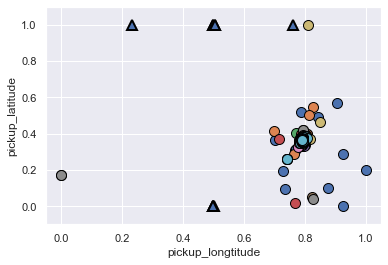

In [168]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

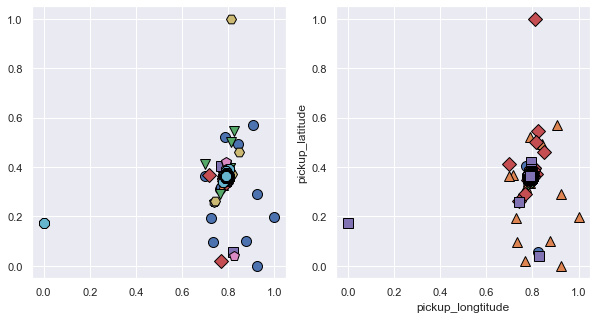

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

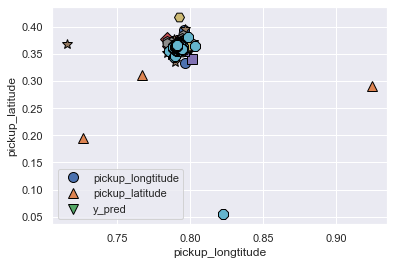

In [170]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 3], X_test_scaled[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

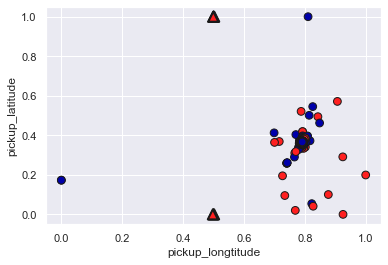

In [171]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

Dropoff_longtitude, Dropoff_latitude
--

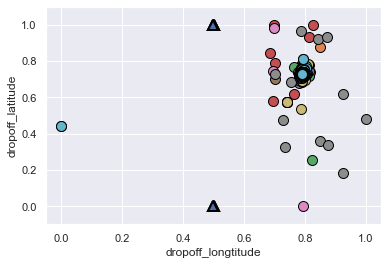

In [172]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

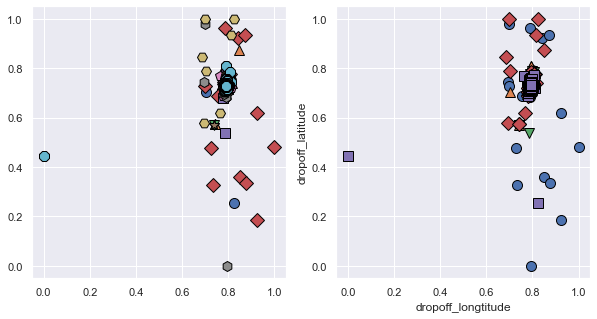

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

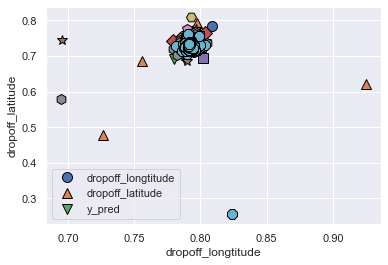

In [174]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 5], X_test_scaled[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

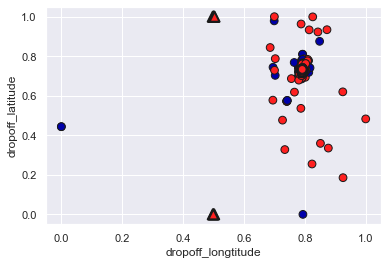

In [175]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 5], X_scaled[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

PCA(MinMaxScaler)
--

In [176]:
X_cen = X_scaled - X_scaled.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 2.06023729e+03  3.22140672e+00  1.88289935e+00 -1.02424700e-02
  -1.33580447e-04 -1.39569192e-02  3.11681310e-03  1.14954747e-01
   2.50717976e+00  2.51544473e+00  2.28733105e+00  2.39823711e+00
   4.47918184e-01 -2.01083132e-01 -6.18161868e-03]
 [ 3.22140672e+00  6.15049551e+03  5.17542910e+02  1.12830088e-01
   4.03021165e-02  2.19719997e-02  1.69492100e-01 -7.29436426e+01
  -2.42020922e+01 -2.57893730e+01  2.62466467e+00  3.19045353e+01
   1.92575432e+00  1.61763169e+01  4.34220212e-01]
 [ 1.88289935e+00  5.17542910e+02  5.27184675e+02  9.16069819e-03
  -3.47233279e-02 -1.44370964e-03 -3.04869525e-02 -5.83265537e+00
  -2.33408081e+00 -2.60134603e+00  2.10949105e+00  9.14263044e+00
  -1.20638002e+01  1.94837430e+00  1.61623779e-01]
 [-1.02424700e-02  1.12830088e-01  9.16069819e-03  3.38452980e-02
   1.22511172e-03  2.64238578e-02  8.86006195e-03  2.31340612e-02
   4.07313774e-02  4.35159489e-02 -7.33756932e-03  8.16985987e-02
  -5.36073865e-04  4.30324561e-02  3.25806531e-02]
 [-1

In [177]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [6.20030031e+03 5.29188358e+03 2.78031383e+03 2.06005383e+03
 2.08322675e+03 1.90883810e+03 4.79853036e+02 1.34719254e+02
 3.33060146e+01 4.65001399e-01 2.46434308e-01 5.84249677e-02
 5.35776659e-02 6.89532648e-03 1.39744775e-07]
eigenvector :
 [[ 7.86100485e-04  1.14913022e-03 -7.50234269e-04 -9.95226303e-01
   9.63100972e-02 -1.56672904e-02 -9.93970440e-04  7.70755892e-05
   1.07934890e-04  2.28912132e-06 -4.51611293e-07  5.22037208e-06
   6.17736227e-06  1.09970317e-06  2.89437567e-09]
 [ 9.94992801e-01  3.89455322e-02  9.81050118e-04  9.57458062e-04
  -8.97155898e-04 -7.91744620e-03 -9.08351133e-02 -1.22270086e-02
  -2.58494770e-03 -1.36573950e-05  4.67042864e-05 -7.12617747e-06
  -5.24755233e-06  8.99789194e-06  2.50877828e-09]
 [ 9.08224743e-02  3.38992080e-03  5.14735916e-03 -8.52369603e-04
   1.42150925e-03  4.26123057e-03  9.95835862e-01  1.26117020e-03
  -1.28899148e-03 -2.57698684e-04 -4.68625558e-05  2.89624947e-05
   3.70238546e-06 -4.91457412e-06 -2.04320337e

In [178]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [2.95627913e-01 2.52314956e-01 1.32564285e-01 9.82225671e-02
 9.93274433e-02 9.10126600e-02 2.28792065e-02 6.42336175e-03
 1.58801785e-03 2.21710863e-05 1.17498922e-05 2.78567979e-06
 2.55456232e-06 3.28766491e-07 6.66297667e-12]


In [179]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [180]:
pca.components_

array([[-7.86100485e-04, -9.94992801e-01, -9.08224743e-02,
        -1.79379213e-05, -6.33310590e-06, -2.86137439e-06,
        -2.72960038e-05,  1.20554664e-02,  2.68312678e-02,
         2.84266990e-02, -3.83786629e-04, -7.67923870e-03,
         8.66894255e-04, -2.60447271e-03, -6.65559048e-05],
       [-1.14913022e-03, -3.89455322e-02, -3.38992080e-03,
        -1.20393568e-05,  4.70218561e-06, -1.19556334e-05,
         1.93359280e-06,  4.83445395e-04, -6.85822172e-01,
        -7.25325791e-01, -9.97528954e-03,  1.82814792e-03,
        -4.37761426e-02, -1.19386948e-03, -1.46351821e-04],
       [-7.50234269e-04,  9.81050118e-04,  5.14735916e-03,
        -9.35898946e-07, -7.72514122e-05,  1.40328969e-05,
        -9.61470658e-05, -7.31237659e-05,  2.90075775e-02,
         3.28825467e-02, -3.57360558e-02, -7.54390926e-02,
        -9.95530516e-01, -3.33274907e-04,  1.21511606e-04],
       [ 9.63100972e-02, -8.97155898e-04,  1.42150925e-03,
        -4.51782082e-06, -4.56949027e-05, -1.74208447

In [181]:
pca.explained_variance_

array([2.50793181e-01, 2.14049038e-01, 1.12459674e-01, 8.42635096e-02,
       8.33261983e-02, 7.72097408e-02, 1.94093614e-02, 5.44919900e-03,
       1.34718012e-03, 1.88086342e-05, 9.96791139e-06, 2.36320545e-06,
       2.16713911e-06, 2.78905985e-07, 5.65249213e-12])

<AxesSubplot:>

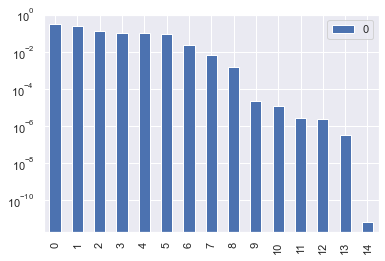

In [182]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC0,2.956279e-01
PC1,2.523150e-01
PC2,1.325643e-01
PC3,9.932744e-02
PC4,9.822257e-02
PC5,9.101266e-02
PC6,2.287921e-02
PC7,6.423362e-03
PC8,1.588018e-03
PC9,2.217109e-05


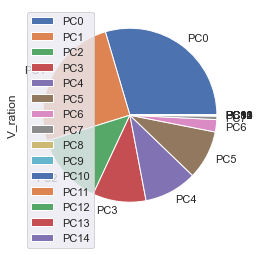

In [184]:
df_v = pd.DataFrame(ratio, index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [185]:
PC_score = pca.transform(X_scaled)
PC_score[:5]

array([[-4.63273439e-01,  1.41044937e-01,  3.14761032e-01,
        -1.72823294e-02, -2.24478179e-01, -1.63647834e-01,
        -1.18420671e-01,  1.06399828e-04, -6.69991907e-03,
        -2.23731807e-03, -8.69422639e-04, -3.32100859e-04,
         1.49052301e-04, -1.48652339e-04, -7.38456599e-07],
       [ 5.69957003e-01, -6.56295336e-01,  7.62250031e-02,
        -1.08469913e-01, -9.63148422e-02,  5.84477586e-01,
        -2.22361170e-02, -1.14348992e-02, -2.13001562e-03,
        -1.14562357e-03,  2.19053844e-03,  1.54686661e-04,
        -3.67845565e-05,  3.11773348e-04,  1.82695909e-06],
       [-4.82259310e-01,  6.52317541e-01, -3.59235867e-01,
         1.54912795e-01, -4.49347882e-01,  1.52548926e-01,
        -1.13985569e-01,  3.45015563e-04,  1.32627215e-02,
         3.23330361e-03,  2.34430684e-03, -1.54090715e-03,
         1.53477482e-03,  3.06856466e-04,  7.53680823e-07],
       [-4.52888320e-01, -1.57108567e-01, -5.00374882e-01,
        -3.00177795e-01, -4.09034601e-01, -1.84846709

StandardScaler 적용하기
--

In [186]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

s_scaler.fit(X_train)

StandardScaler()

In [187]:
s_X_scaled=s_scaler.transform(X)

In [188]:
# 데이터 변환
s_X_train_scaled = s_scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", s_X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_train_scaled.max(axis=0))

변환된 후 크기: (1166915, 15)
스케일 조정 전 특성별 최소값:
 id                    1.000000e+00
vendor_id             1.000000e+00
passenger_count       0.000000e+00
pickup_longitude     -1.219333e+02
pickup_latitude       3.435970e+01
dropoff_longitude    -1.219333e+02
dropoff_latitude      3.218114e+01
store_and_fwd_flag    0.000000e+00
time_pickup           1.010000e+08
month_pickup          1.000000e+00
date_pickup           1.000000e+00
hour_pickup           0.000000e+00
day_pickup            0.000000e+00
elapsed_time_h        2.800000e-04
pred_distance         0.000000e+00
dtype: float64
스케일 조정 전 특성별 최대값:
 id                    1.458643e+06
vendor_id             2.000000e+00
passenger_count       9.000000e+00
pickup_longitude     -6.133553e+01
pickup_latitude       5.188108e+01
dropoff_longitude    -6.133553e+01
dropoff_latitude      4.392103e+01
store_and_fwd_flag    1.000000e+00
time_pickup           6.302359e+08
month_pickup          6.000000e+00
date_pickup           3.100000e+01
hour_pickup  

In [189]:
# 테스트 데이터 변환
s_X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", s_X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [-6.85569180e-07  0.00000000e+00  0.00000000e+00  7.15965456e-01
  5.42543239e-02  6.94997898e-01  2.54892136e-01  0.00000000e+00
  6.80225935e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
스케일 조정 후 특성별 최대값:
 [0.9999952  1.         0.77777778 0.92471914 0.4187511  0.92471909
 0.81024721 1.         0.99999995 1.         1.         1.
 1.         0.99998833 0.53238972]


Pickup_longtitude, Pickup_latitude
--

In [190]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)

print(kmeans.labels_)

print(kmeans.predict(s_X_scaled))

[1 0 1 ... 0 2 8]
[1 0 1 ... 0 2 8]


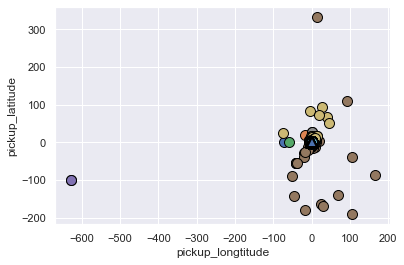

In [191]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

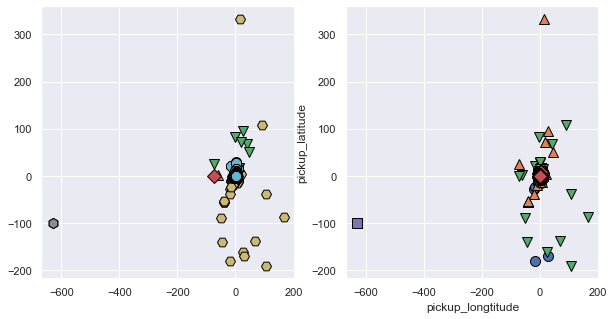

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

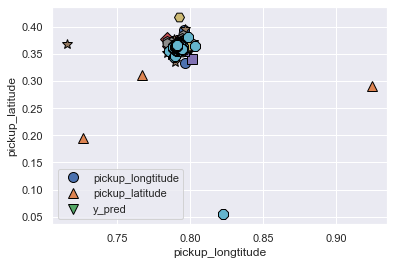

In [193]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(s_X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 3], X_test_scaled[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

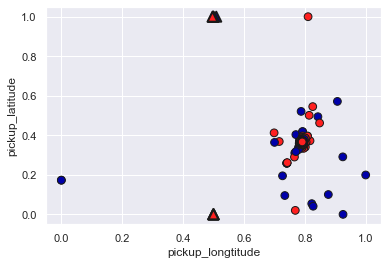

In [194]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

Dropoff_longtitude, Dropoff_latitude
--

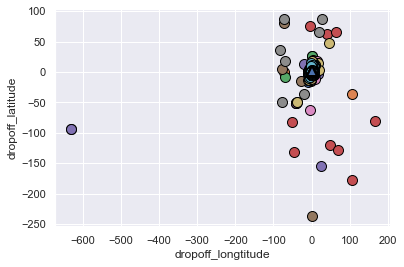

In [195]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

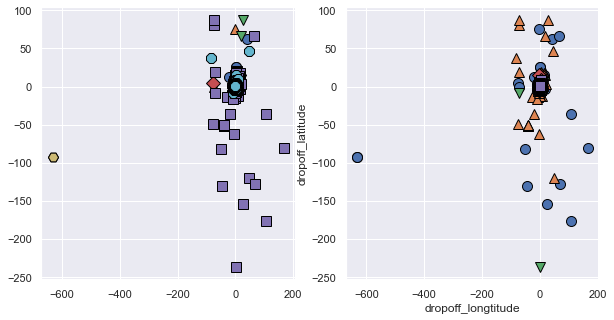

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

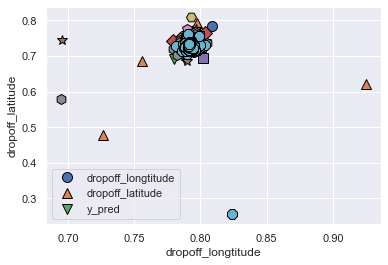

In [197]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(s_X_test_scaled)

mglearn.discrete_scatter(s_X_test_scaled[:, 5], s_X_test_scaled[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

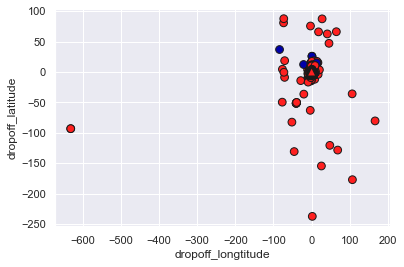

In [198]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
y_pred = kmeans.predict(s_X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

PCA(StandardScaler)
--

In [199]:
X_cen = s_X_scaled - s_X_scaled.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 2.47274027e+04  2.23758293e+01  4.46925969e+01 -2.81841082e+01
  -2.42657504e-01 -3.85744463e+01  3.50611142e+00  5.36124347e+00
   2.73268758e+01  2.59168028e+01  2.73132993e+01  2.98478470e+01
   4.62813571e+00 -1.90927889e+01 -4.93875559e+00]
 [ 2.23758293e+01  2.47238447e+04  7.10930536e+03  1.79678803e+02
   4.23692725e+01  3.51440688e+01  1.10340954e+02 -1.96878544e+03
  -1.52661576e+02 -1.53772880e+02  1.81380788e+01  2.29797677e+02
   1.15154415e+01  8.88885245e+02  2.00769472e+02]
 [ 4.46925969e+01  7.10930536e+03  2.47467680e+04  4.98511750e+01
  -1.24743923e+02 -7.89109402e+00 -6.78228746e+01 -5.37962698e+02
  -5.03115413e+01 -5.30044089e+01  4.98161374e+01  2.25029410e+02
  -2.46512391e+02  3.65858667e+02  2.55368782e+02]
 [-2.81841082e+01  1.79678803e+02  4.98511750e+01  2.13518878e+04
   5.10228679e+02  1.67434403e+04  2.28502024e+03  2.47359640e+02
   1.01782226e+02  1.02790610e+02 -2.00879535e+01  2.33116942e+02
  -1.26990246e+00  9.36759711e+02  5.96778882e+03]
 [-2

In [200]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [4.94911969e+04 4.15976058e+04 3.93649150e+04 4.32047599e+03
 1.31027098e-06 1.19746701e+04 3.23501424e+04 1.74443678e+04
 1.81719435e+04 2.55577262e+04 2.38952724e+04 2.42986102e+04
 2.48452980e+04 2.47245332e+04 2.46768531e+04]
eigenvector :
 [[ 1.41761504e-03  2.54793491e-03 -1.39654327e-03  2.85756886e-04
   2.55804157e-09 -1.84996899e-04  6.13678345e-03  1.49673683e-03
  -3.02394551e-03 -2.61829488e-02  1.61345332e-02  6.79568015e-02
   1.92992437e-01 -9.73887574e-01  9.31305751e-02]
 [-8.95534755e-03 -1.93646700e-02  3.09354388e-02  4.37974626e-03
   3.83125070e-09 -1.87833470e-03  6.95020795e-01  7.10284619e-01
  -6.75338704e-02  1.54384563e-02  5.74811782e-02 -4.64090601e-02
   2.35798365e-02  8.59376025e-03  1.09561077e-02]
 [-5.06466269e-03 -9.98558250e-03  3.65464405e-02 -1.20358767e-03
  -9.13096872e-09  5.66427252e-04  6.70573209e-01 -6.80073939e-01
   6.13845136e-02  4.03196129e-02  1.05459029e-01 -2.61384333e-01
   3.53981005e-02 -6.17654680e-03  1.54904213e

In [201]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [1.36447036e-01 1.14684436e-01 1.08528916e-01 1.19115353e-02
 3.61241194e-12 3.30141184e-02 8.91892156e-02 4.80940535e-02
 5.00999767e-02 7.04625507e-02 6.58791721e-02 6.69911730e-02
 6.84983890e-02 6.81654410e-02 6.80339872e-02]


In [202]:
pca = PCA()
pca.fit(s_X_scaled)

PCA()

In [203]:
pca.components_

array([[-1.41761504e-03,  8.95534755e-03,  5.06466269e-03,
        -2.84495634e-02,  1.14232596e-02, -2.53979815e-02,
         6.81930976e-03, -3.12591843e-03, -7.05253641e-01,
        -7.04823882e-01, -1.59099410e-02,  4.42104751e-03,
        -4.00118027e-02, -2.71715119e-02, -3.84659709e-02],
       [ 2.54793491e-03, -1.93646700e-02, -9.98558250e-03,
        -6.16776613e-01, -2.78379351e-01, -6.23365813e-01,
        -3.39768417e-01, -1.22201277e-02,  2.59145128e-02,
         2.56471824e-02,  5.42597262e-03,  2.15554683e-03,
        -3.98672453e-03, -6.12319159e-02, -1.79735467e-01],
       [-1.39654327e-03,  3.09354388e-02,  3.65464405e-02,
         2.29848153e-01, -5.76795972e-01,  1.42199381e-01,
        -5.24474331e-01,  3.94775299e-02, -3.14111145e-02,
        -3.21964251e-02,  1.50832790e-02, -3.40370854e-02,
        -3.22491229e-02,  2.28284808e-01,  5.08690397e-01],
       [ 6.13678345e-03,  6.95020795e-01,  6.70573209e-01,
        -3.26653679e-02,  3.38578785e-02, -3.51178696

In [204]:
pca.explained_variance_

array([2.00184735e+00, 1.68256300e+00, 1.59225389e+00, 1.30851648e+00,
       1.03377307e+00, 1.00495638e+00, 1.00007161e+00, 9.98143024e-01,
       9.82843645e-01, 9.66529212e-01, 7.35028834e-01, 7.05599450e-01,
       4.84358088e-01, 1.74757006e-01, 5.29914884e-11])

<AxesSubplot:>

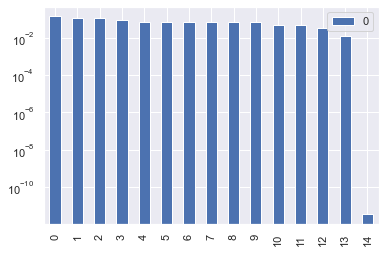

In [205]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC0,1.364470e-01
PC1,1.146844e-01
PC2,1.085289e-01
PC3,8.918922e-02
PC4,7.046255e-02
PC5,6.849839e-02
PC6,6.816544e-02
PC7,6.803399e-02
PC8,6.699117e-02
PC9,6.587917e-02


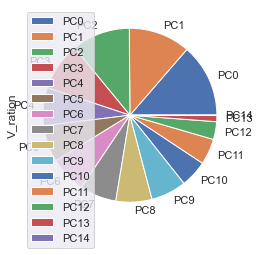

In [206]:
df_v = pd.DataFrame(ratio, index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [207]:
PC_score = pca.transform(s_X_scaled)
PC_score[:5]

array([[ 5.20404957e-01, -2.00654740e-01, -7.43443562e-01,
         3.80042587e-01, -3.40490899e-01,  1.42658145e-01,
         8.18099303e-01, -2.30981913e-01, -1.66933515e-01,
        -9.44475810e-01, -2.38811661e-01,  1.00681228e+00,
         6.26645563e-02, -1.13247386e-01, -2.26103857e-06],
       [-2.06312882e+00,  7.32285993e-01,  1.60581507e-01,
        -1.16132639e+00, -1.52989639e+00,  6.97194049e-02,
         3.59691184e-01,  3.59630558e-01,  6.96745280e-01,
         1.24368299e+00, -3.79945540e-01, -4.45341120e-01,
         9.29806755e-03,  2.66458185e-01,  5.59386078e-06],
       [ 2.02529018e+00,  3.62104798e-01,  8.10437155e-01,
         3.01043564e-01,  7.37884245e-01, -5.54763865e-01,
         1.48875645e+00,  3.00676083e-01,  6.86133622e-01,
         8.88335876e-01,  8.71008979e-02,  9.67223774e-01,
         1.13606210e+00,  2.52185306e-01,  2.30765673e-06],
       [-3.69279438e-01,  1.38810011e+00,  6.15264777e-01,
         3.01564756e-01,  1.07287377e+00, -3.92873812

StandardScaler의 결과를 K-means를 이용하여 군집화 하기
--

In [208]:
s_X_scaled

array([[ 0.75984483,  0.93209347, -0.50537005, ..., -0.99003007,
        -0.15739311, -0.47412934],
       [ 0.32878792, -1.07285377, -0.50537005, ...,  0.00412814,
        -0.09140364, -0.35255741],
       [ 1.60954639,  0.93209347, -0.50537005, ...,  0.99828636,
         0.37208729,  0.65720354],
       ...,
       [ 0.26607577,  0.93209347, -0.50537005, ..., -1.48710918,
        -0.05936826,  1.08434242],
       [ 0.6202887 , -1.07285377, -0.50537005, ...,  0.99828636,
        -0.18340973, -0.51148805],
       [-0.68232782, -1.07285377, -0.50537005, ...,  0.99828636,
        -0.23892631, -0.50674628]])

In [209]:
cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,elapsed_time_h,pred_distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,3,14,17,1,0.12639,1.73544
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,6,12,0,3,0.18417,2.43050
2,1406899,2,1,-73.979027,40.763939,-74.005333,40.710087,0,119113524,1,19,11,5,0.59000,8.20358
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,4,6,19,6,0.11917,1.66133
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,3,26,13,2,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,4,8,13,0,0.21611,1.66590
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,110073515,1,10,7,3,0.18194,8.05858
1458641,841251,2,1,-73.959129,40.768799,-74.004433,40.707371,0,422065741,4,22,6,0,0.21222,10.64565
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1,5,15,5,0.10361,1.52185


In [210]:
i=0
p_lon=[]
p_la=[]
d_lon=[]
d_la=[]


for i in range(0,1458644):
    p_lon.append(s_X_scaled[i][3])
    p_la.append(s_X_scaled[i][4])
    d_lon.append(s_X_scaled[i][5])
    d_la.append(s_X_scaled[i][6])
    i+=1


In [211]:
p_lon=pd.Series(p_lon)
p_la=pd.Series(p_la)
d_lon=pd.Series(d_lon)
d_la=pd.Series(d_la)

cl_train['p_lon']=p_lon
cl_train['p_la']=p_la
cl_train['d_lon']=d_lon
cl_train['d_la']=d_la

cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,elapsed_time_h,pred_distance,p_lon,p_la,d_lon,d_la
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,3,14,17,1,0.12639,1.73544,-0.113195,0.509496,0.116038,0.382007
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,6,12,0,3,0.18417,2.43050,-0.090395,-0.369531,-0.342778,-0.570825
2,1406899,2,1,-73.979027,40.763939,-74.005333,40.710087,0,119113524,1,19,11,5,0.59000,8.20358,-0.072195,0.389857,-0.419817,-1.153433
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,4,6,19,6,0.11917,1.66133,-0.478697,-0.925944,-0.511118,-1.246596
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,3,26,13,2,0.12083,1.19946,0.006105,1.265803,0.006859,0.849930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,4,8,13,0,0.21611,1.66590,-0.113795,-0.161304,-0.282614,-0.321407
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,110073515,1,10,7,3,0.18194,8.05858,-0.359497,-0.105709,0.042917,1.237878
1458641,841251,2,1,-73.959129,40.768799,-74.004433,40.707371,0,422065741,4,22,6,0,0.21222,10.64565,0.188606,0.535296,-0.407965,-1.228554
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1,5,15,5,0.10361,1.52185,-0.112195,-0.055364,-0.015640,0.147044


In [212]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

s_scaler.fit(cl_test)
s_test_scaled=s_scaler.transform(cl_test)

In [213]:
cl_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,pred_distance
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,4,2.91330
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,4,3.10480
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,4,1.84634
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,4,7.16334
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,4,1.35416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,0,1.13575
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,0,8.76282
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,0,9.30275
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,0,27.89350


In [214]:
i=0
p_lon=[]
p_la=[]
d_lon=[]
d_la=[]


for i in range(0,625134):
    p_lon.append(s_test_scaled[i][3])
    p_la.append(s_test_scaled[i][4])
    d_lon.append(s_test_scaled[i][5])
    d_la.append(s_test_scaled[i][6])
    i+=1


In [215]:
p_lon=pd.Series(p_lon)
p_la=pd.Series(p_la)
d_lon=pd.Series(d_lon)
d_la=pd.Series(d_la)

cl_test['p_lon']=p_lon
cl_test['p_la']=p_la
cl_test['d_lon']=d_lon
cl_test['d_la']=d_la

cl_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,pred_distance,p_lon,p_la,d_lon,d_la
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,4,2.91330,-0.197773,-0.633160,-0.230349,0.135761
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,4,3.10480,0.128241,-2.376546,0.188104,-2.691303
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,4,1.84634,-0.324602,-0.447076,-0.175046,-0.622304
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,4,7.16334,0.239060,0.702656,-0.178726,-0.595896
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,4,1.35416,0.046321,0.353366,0.164658,0.113719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,0,1.13575,-0.406729,-0.865126,-0.383011,-0.507301
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,0,8.76282,-0.446234,-0.239393,0.276315,0.855598
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,0,9.30275,0.018357,0.299432,1.334750,-0.087964
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,0,27.89350,-0.039340,-0.581783,1.642596,3.907238


K-means를 이용하여 군집화하기
--

In [216]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(cl_train[['p_lon','p_la']])
pickup_clusters = kmeans.predict(cl_train[['p_lon','p_la']])
pickup_clusters

cl_train['pickup_clusters']=pickup_clusters

In [217]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(cl_train[['d_lon','d_la']])
dropoff_clusters = kmeans.predict(cl_train[['d_lon','d_la']])
dropoff_clusters

cl_train['dropoff_clusters']=dropoff_clusters

In [218]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(cl_test[['p_lon','p_la']])
pickup_clusters = kmeans.predict(cl_test[['p_lon','p_la']])
pickup_clusters

cl_test['pickup_clusters']=pickup_clusters

In [219]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(cl_test[['d_lon','d_la']])
dropoff_clusters = kmeans.predict(cl_test[['d_lon','d_la']])
dropoff_clusters

cl_test['dropoff_clusters']=dropoff_clusters

In [220]:
cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,...,hour_pickup,day_pickup,elapsed_time_h,pred_distance,p_lon,p_la,d_lon,d_la,pickup_clusters,dropoff_clusters
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,3,...,17,1,0.12639,1.73544,-0.113195,0.509496,0.116038,0.382007,0,5
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,6,...,0,3,0.18417,2.43050,-0.090395,-0.369531,-0.342778,-0.570825,8,0
2,1406899,2,1,-73.979027,40.763939,-74.005333,40.710087,0,119113524,1,...,11,5,0.59000,8.20358,-0.072195,0.389857,-0.419817,-1.153433,0,0
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,4,...,19,6,0.11917,1.66133,-0.478697,-0.925944,-0.511118,-1.246596,4,0
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,3,...,13,2,0.12083,1.19946,0.006105,1.265803,0.006859,0.849930,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,4,...,13,0,0.21611,1.66590,-0.113795,-0.161304,-0.282614,-0.321407,8,0
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,110073515,1,...,7,3,0.18194,8.05858,-0.359497,-0.105709,0.042917,1.237878,8,1
1458641,841251,2,1,-73.959129,40.768799,-74.004433,40.707371,0,422065741,4,...,6,0,0.21222,10.64565,0.188606,0.535296,-0.407965,-1.228554,0,0
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1,...,15,5,0.10361,1.52185,-0.112195,-0.055364,-0.015640,0.147044,8,5


In [221]:
cl_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,pred_distance,p_lon,p_la,d_lon,d_la,pickup_clusters,dropoff_clusters
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,4,2.91330,-0.197773,-0.633160,-0.230349,0.135761,0,0
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,4,3.10480,0.128241,-2.376546,0.188104,-2.691303,4,9
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,4,1.84634,-0.324602,-0.447076,-0.175046,-0.622304,9,7
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,4,7.16334,0.239060,0.702656,-0.178726,-0.595896,5,7
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,4,1.35416,0.046321,0.353366,0.164658,0.113719,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,0,1.13575,-0.406729,-0.865126,-0.383011,-0.507301,0,7
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,0,8.76282,-0.446234,-0.239393,0.276315,0.855598,9,3
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,0,9.30275,0.018357,0.299432,1.334750,-0.087964,8,1
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,0,27.89350,-0.039340,-0.581783,1.642596,3.907238,0,8


군집화 결과 시각화
--

1. train

- pick up

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

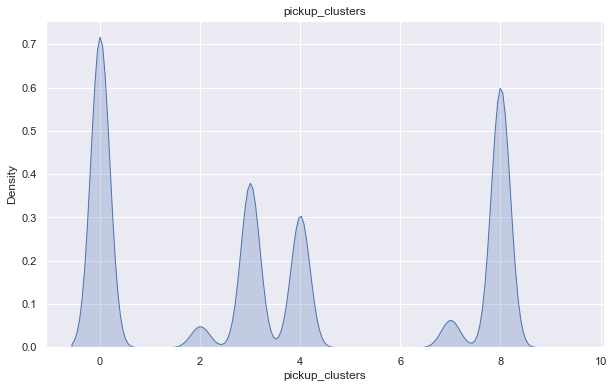

In [222]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=cl_train['pickup_clusters'], shade=True)

- dropoff

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

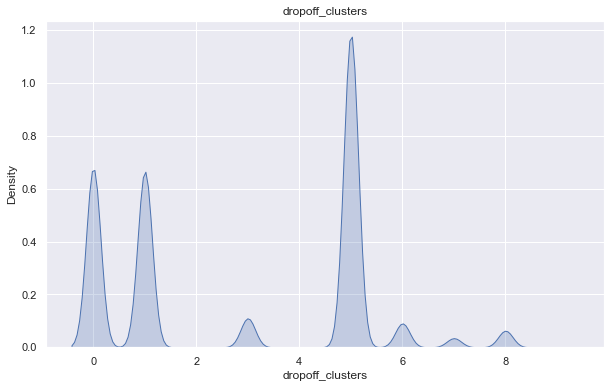

In [223]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=cl_train['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

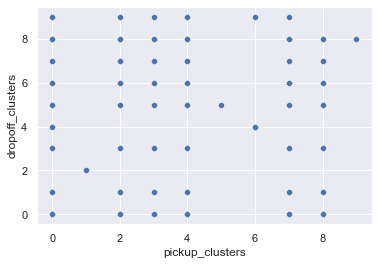

In [224]:
tn_pickup_dropoff=cl_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])

2. test

- pickup

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

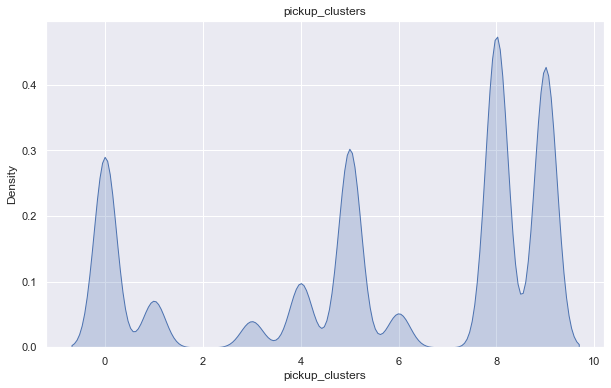

In [225]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=cl_test['pickup_clusters'], shade=True)

- dropoff

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

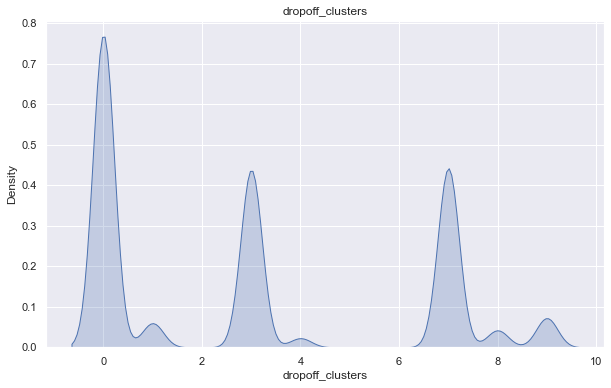

In [226]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=cl_test['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

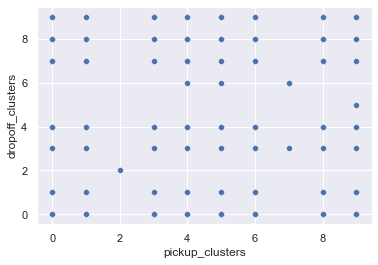

In [227]:
te_pickup_dropoff=cl_test.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(te_pickup_dropoff['pickup_clusters'], te_pickup_dropoff['dropoff_clusters'])

군집 분석 결과 One-Hot Encoding
--

In [228]:
pickup_clusters_tn = pd.get_dummies(cl_train['pickup_clusters'], prefix='pickup_cluster')
dropoff_clusters_tn = pd.get_dummies(cl_train['dropoff_clusters'], prefix='dropoff_cluster')
pickup_clusters_te = pd.get_dummies(cl_test['pickup_clusters'], prefix='pickup_cluster')
dropoff_clusters_te = pd.get_dummies(cl_test['dropoff_clusters'], prefix='dropoff_cluster')

In [229]:
clusters_tn=pickup_clusters_tn.join(dropoff_clusters_tn)
clusters_te=pickup_clusters_te.join(dropoff_clusters_te)

train 지점별 상관관계
--

출발 지점

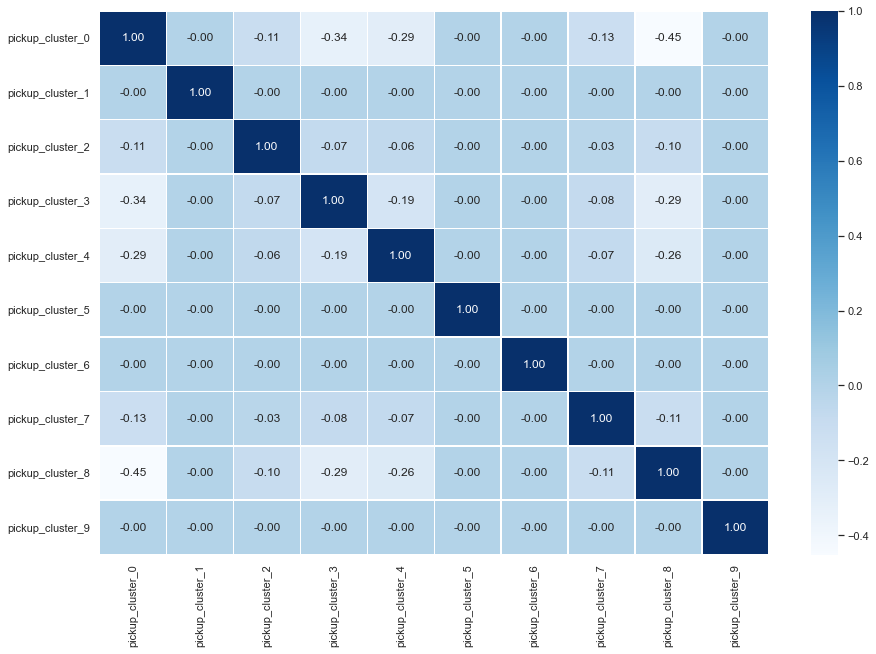

In [230]:
plt.figure(figsize=(15,10))
sns.heatmap(data=pickup_clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

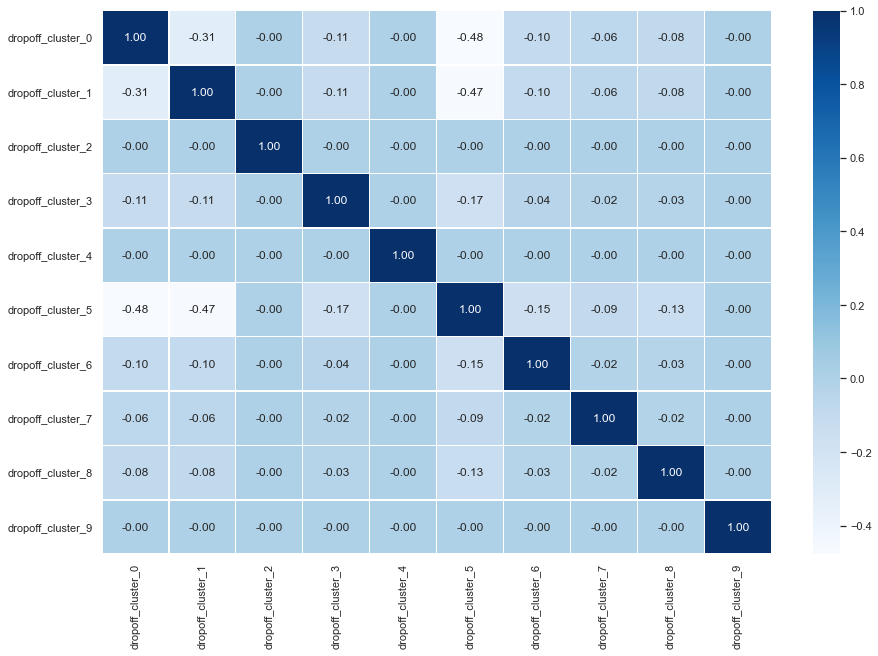

In [231]:
plt.figure(figsize=(15,10))
sns.heatmap(data=dropoff_clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

각 지점 별 상관관계

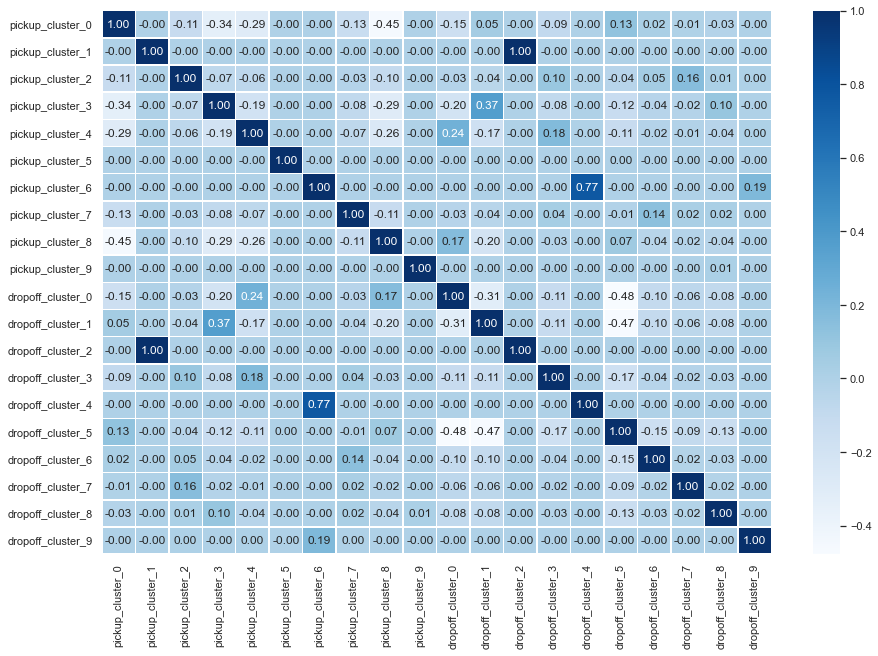

In [232]:
plt.figure(figsize=(15,10))
sns.heatmap(data=clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

test 지점별 상관관계
--

출발 지점

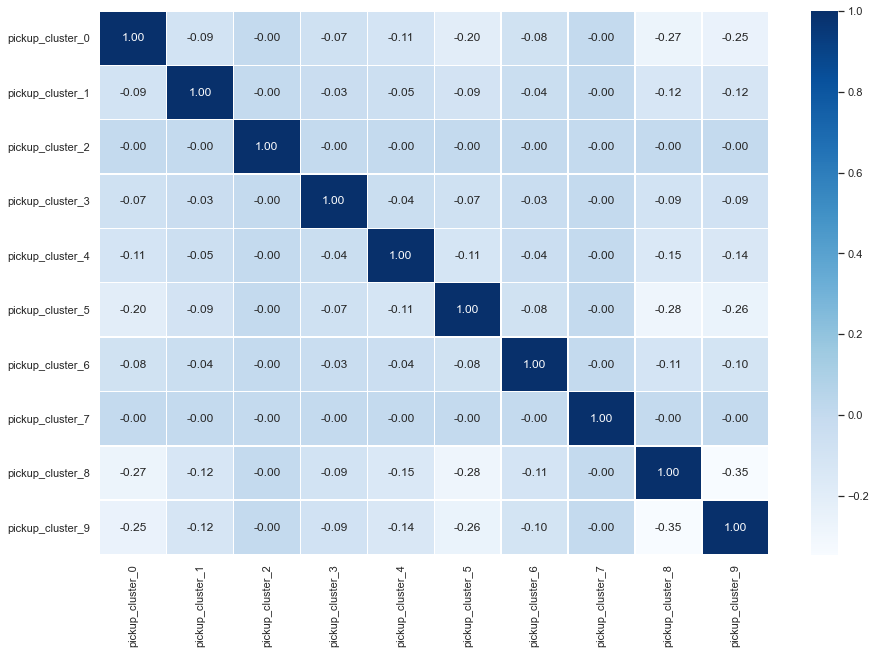

In [233]:
plt.figure(figsize=(15,10))
sns.heatmap(data=pickup_clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

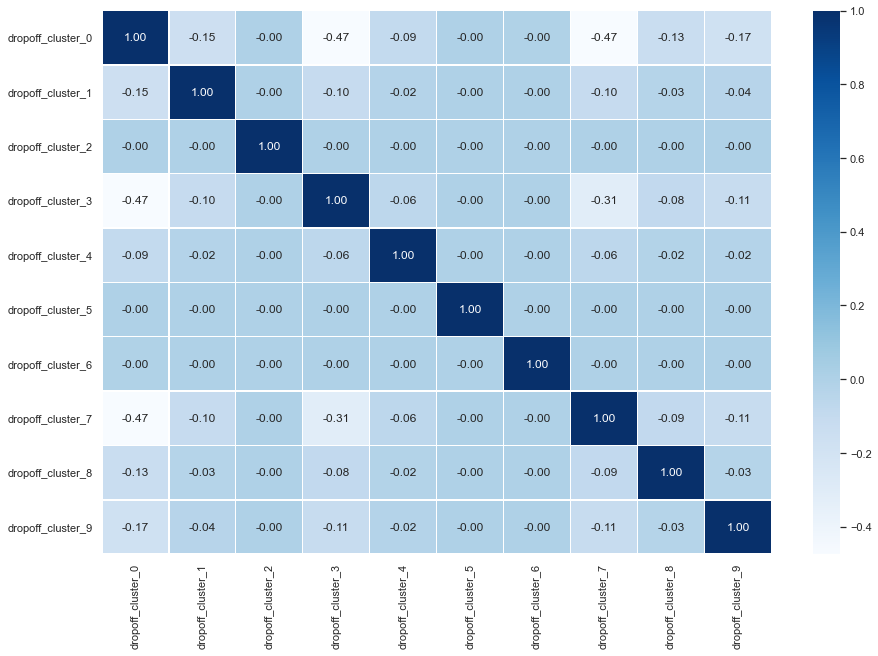

In [234]:
plt.figure(figsize=(15,10))
sns.heatmap(data=dropoff_clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

각 지점 별 상관관계
--

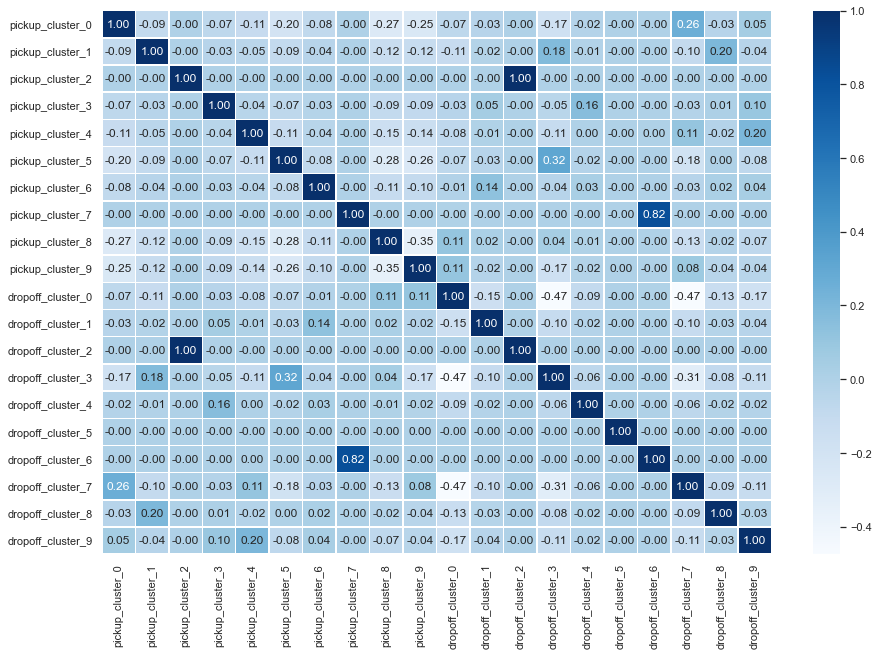

In [235]:
plt.figure(figsize=(15,10))
sns.heatmap(data=clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

군집분석 결과를 첫 번째 풀이과정(선형회귀)에 대입해서 한 번 더 풀어보겠습니다.
--

In [236]:
df_train['pickup_clusters']=kmeans.predict(cl_train[['p_lon','p_la']])
df_train['dropoff_clusters']=kmeans.predict(cl_train[['d_lon','d_la']])
df_test['pickup_clusters']=kmeans.predict(cl_test[['p_lon','p_la']])
df_test['dropoff_clusters']=kmeans.predict(cl_test[['d_lon','d_la']])

In [237]:
lr_train=df_train.drop(['pickup_datetime','dropoff_datetime','elapsed_time','day_pickup','day_dropoff',
                      'month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff','distance'], axis=1)

In [238]:
lr_test=df_test.drop(['pickup_datetime','distance','day_pickup', 'month_pickup','date_pickup','hour_pickup'], axis=1)

In [239]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_train_encoded_id=le.fit_transform(lr_train['id'])
np_id=lr_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_train['id']=id_1

In [240]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_test_encoded_id=le.fit_transform(lr_test['id'])
np_id=lr_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_test['id']=id_1

In [241]:
lr_train=remove_outlier_test(lr_train, 'elapsed_time_h' )
lr_train=remove_outlier_test(lr_train, 'pred_distance' )

74324
(1384320, 15)
105861
(1278459, 15)


In [242]:
np_elap=np.array([lr_train.elapsed_time_h])
np_dis=np.array([lr_train.pred_distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
lr_train['km_h']=np_speed

In [243]:
lr_train=remove_outlier_test(lr_train, 'km_h' )

42147
(1236312, 16)


In [244]:
X_train=lr_train.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [245]:
y_train=lr_train.trip_duration

In [246]:
X_test=lr_test

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [248]:
y_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 282.26805682815547 입니다.
r2 는 0.5 입니다.
train 스코어는 0.5013052499784281 입니다.


In [249]:
pred=reg_all.predict(X_test)

In [250]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [251]:
submission

,id,trip_duration
0,id3004672,745.376076
1,id3505355,786.238853
2,id1217141,538.847312
3,id2150126,1372.024089
4,id1598245,542.980156
...,...,...
625129,id3008929,366.046480
625130,id3700764,1480.639343
625131,id2568735,1645.337016
625132,id1384355,4026.799557


In [252]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X_train)

model_1=sm.OLS(y_train,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 1.036e+05
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:41:16   Log-Likelihood:            -8.7306e+06
No. Observations:             1236312   AIC:                         1.746e+07
Df Residuals:                 1236299   BIC:                         1.746e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.928e+04    598.795     65.603      0.000    3.81e+04    4.05e+04
id                  1.072e-06   6.03e-07      1.777      0.076    -1.1e-07    2.25e-06
vendor_id              0.6218      0.533      1.166      0.243      -0.423       1.667
passenger_count        2.1958      0.202     10.863      0.000       1.800       2.592
pickup_longitude     261.7102     15.688     16.682      0.000     230.962     292.458
pickup_latitude      696.6312     16.944     41.115      0.000     663.422     729.840
dropoff_longitude   -317.4116     15.578    -20.376      0.000    -347.944    -286.880
dropoff_latitude   -1755.3953     15.920   -110.263      0.000   -1786.598   -1724.193
store_and_fwd_flag    19.7536      3.682      5.366      0.000      12.538      26.969
time_pickup          1.03e-07   1.51e-09     68.209      0.000       1e-07    1.06e-07
pred_distance        148.9636      0.136   1093.167      0.000     148.697     149.231
pickup_clusters       -1.8008      0.098    -18.463      0.000      -1.992      -1.610
dropoff_clusters     -13.5888      0.098   -138.390      0.000     -13.781     -13.396
==============================================================================
Omnibus:                   272758.729   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           723059.501
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       5.890   Cond. No.                     9.50e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

pickup_latitude        696.6
pickup_longitude       261.7
pred_distance          149.0
store_and_fwd_flag      19.8
passenger_count          2.2
vendor_id                0.6
time_pickup              0.0
id                       0.0
pickup_clusters         -1.8
dropoff_clusters       -13.6
dropoff_longitude     -317.4
dropoff_latitude     -1755.4
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

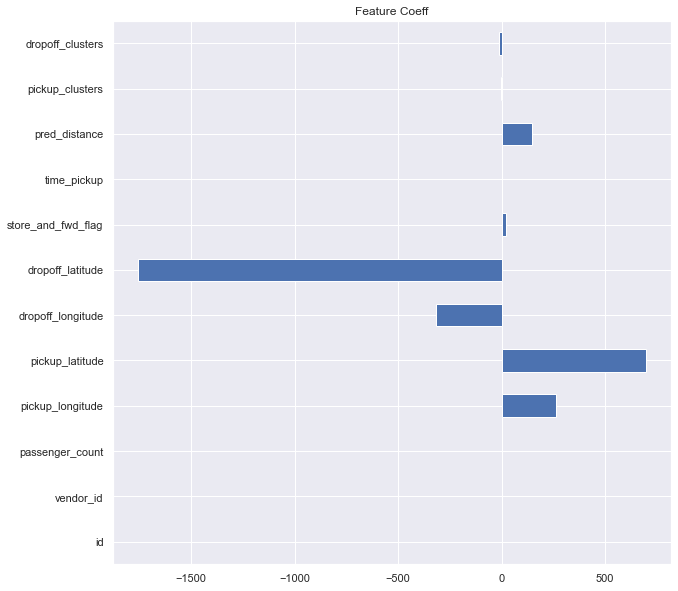

In [254]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

- 후기: train의 score는 이전에 비해 1점만점에 0.009점이 올랐으나, 실제 kaggle 점수는 오히려 1점만점에 0.00359점이 떨어졌음.

Second Solution Process
--

Machine learning( Classification)
--

In [263]:
cl_test=cl_test.join(clusters_te)

In [264]:
cl_train=cl_train.join(clusters_tn)

In [268]:
c_train=cl_train.drop(['pickup_longitude','dropoff_longitude','pickup_latitude',
                'dropoff_latitude','p_lon','p_la','d_lon','d_la',
                'id','time_pickup','month_pickup','date_pickup',
                 'hour_pickup','day_pickup','pickup_clusters','dropoff_clusters'], axis=1)
c_train

,vendor_id,passenger_count,store_and_fwd_flag,elapsed_time_h,pred_distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,...,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9
0,2,1,0,0.12639,1.73544,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0.18417,2.43050,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,1,0,0.59000,8.20358,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,1,0,0.11917,1.66133,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,2,1,0,0.12083,1.19946,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,0,0.21611,1.66590,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1458640,1,1,0,0.18194,8.05858,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1458641,2,1,0,0.21222,10.64565,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1458642,1,1,0,0.10361,1.52185,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [269]:
c_test=cl_test.drop(['pickup_longitude','dropoff_longitude','pickup_latitude',
                'dropoff_latitude','p_lon','p_la','d_lon','d_la',
                 'id','time_pickup','month_pickup','date_pickup',
                 'hour_pickup','day_pickup','pickup_clusters','dropoff_clusters'], axis=1)

c_test

,vendor_id,passenger_count,store_and_fwd_flag,pred_distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,...,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9
0,1,1,1,2.91330,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,3.10480,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1.84634,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,7.16334,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,1.35416,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,1,1,1.13575,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
625130,1,1,1,8.76282,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
625131,1,2,1,9.30275,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
625132,1,1,1,27.89350,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [270]:
y=df_train.trip_duration

One-hot Encoding
--

In [271]:
vendor_id_tn = pd.get_dummies(c_train['vendor_id'], prefix='vendor_id')
passenger_count_tn = pd.get_dummies(c_train['passenger_count'], prefix='passenger_count')
store_and_fwd_flag_tn = pd.get_dummies(c_train['store_and_fwd_flag'], prefix='store_and_fwd_flag')

vendor_id_te = pd.get_dummies(c_test['vendor_id'], prefix='vendor_id')
passenger_count_te = pd.get_dummies(c_test['passenger_count'], prefix='passenger_count')
store_and_fwd_flag_te = pd.get_dummies(c_test['store_and_fwd_flag'], prefix='store_and_fwd_flag')

c_train=c_train.join(vendor_id_tn)
c_train=c_train.join(passenger_count_tn)
c_train=c_train.join(store_and_fwd_flag_tn)

c_test=c_test.join(vendor_id_te)
c_test=c_test.join(passenger_count_te)
c_test=c_test.join(store_and_fwd_flag_te)


이상치 제거
--

In [274]:
c_train=remove_outlier_test(c_train, 'elapsed_time_h' )
c_train=remove_outlier_test(c_train, 'pred_distance' )

74324
(1384320, 39)
105861
(1278459, 39)


In [275]:
np_elap=np.array([c_train.elapsed_time_h])
np_dis=np.array([c_train.pred_distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
c_train['km_h']=np_speed

In [276]:
c_train=remove_outlier_test(c_train, 'km_h' )

42147
(1236312, 40)


In [384]:
X_train=c_train.drop(['vendor_id','passenger_count','store_and_fwd_flag','elapsed_time_h','km_h'], axis=1)
X_train

,pred_distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,...,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,1.73544,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.43050,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1.66133,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.19946,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1.55418,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,4.96633,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458638,2.34620,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1458639,1.66590,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1458642,1.52185,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [385]:
X_test=c_test.drop(['vendor_id','passenger_count','store_and_fwd_flag'], axis=1)

In [386]:
i=0
p7=[]
p8=[]
sf=[]

for i in range(0,625134):
    p7.append(0)
    p8.append(0)
    sf.append(0)
    i+=1

In [387]:
p7=pd.Series(p7)
p8=pd.Series(p8)
sf=pd.Series(sf)

X_test['passenger_count_7']=p7
X_test['passenger_count_8']=p8
X_test['store_and_fwd_flag_0']=sf

X_test=X_test[['pred_distance', 'pickup_cluster_0', 'pickup_cluster_1',
       'pickup_cluster_2', 'pickup_cluster_3', 'pickup_cluster_4',
       'pickup_cluster_5', 'pickup_cluster_6', 'pickup_cluster_7',
       'pickup_cluster_8', 'pickup_cluster_9', 'dropoff_cluster_0',
       'dropoff_cluster_1', 'dropoff_cluster_2', 'dropoff_cluster_3',
       'dropoff_cluster_4', 'dropoff_cluster_5', 'dropoff_cluster_6',
       'dropoff_cluster_7', 'dropoff_cluster_8', 'dropoff_cluster_9',
       'vendor_id_1', 'vendor_id_2', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'passenger_count_8', 'passenger_count_9', 'store_and_fwd_flag_0',
       'store_and_fwd_flag_1']]
X_test

,pred_distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,...,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,2.91330,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.10480,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.84634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7.16334,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.35416,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1.13575,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
625130,8.76282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
625131,9.30275,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
625132,27.89350,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [393]:
y_train=lr_train.trip_duration
y_train

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236312, dtype: int64

Decision Tree, Random Forest, Ada Boosting, Gradient Boosting, LightGBM, CatBoost 등등 모델에 적용해 본 결과, XGBoosting 결과가 제일 좋았으므로, XGB모델을 사용하겠습니다.


XGBoost
--

In [439]:
from xgboost import XGBClassifier
import xgboost as xgb
import tqdm
import timeit
from tqdm import tqdm
from tqdm import notebook
from tqdm import tqdm_notebook
from time import sleep

reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(reg.fit(X_train, y_train))
%time
XGBscore_train = reg.score(X_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))


Wall time: 0 ns
XGboosting train 점수는 0.532


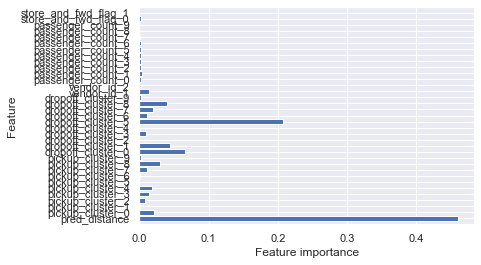

In [440]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(reg)


In [441]:
pred=reg.predict(X_test)

In [442]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float32
dtypes: float32(1), object(1)
memory usage: 7.2+ MB


In [443]:
submission

,id,trip_duration
0,id3004672,702.896606
1,id3505355,706.337280
2,id1217141,600.761597
3,id2150126,1111.078491
4,id1598245,420.982239
...,...,...
625129,id3008929,467.830383
625130,id3700764,1624.917480
625131,id2568735,1541.001221
625132,id1384355,1533.635986
